# Analysing the World Happiness Report 2019
You can download the data from: https://worldhappiness.report/ed/2019/

## Using pandas
https://pandas.pydata.org/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
sns.set()

## 1. Import the dataset
Use a local copy if you update the data on a regular basis

In [2]:
#dataframe = pd.read_excel('https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls')
dataframe = pd.read_excel('Chapter2OnlineData.xls')

In [3]:
dataframe.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_columns', None)
dataframe.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
count,1704.000000,1704.000000,1676.000000,1691.000000,1676.000000,1675.000000,1622.000000,1608.000000,1685.000000,1691.000000,1530.000000,1558.000000,1559.000000,1704.000000,1704.000000,643.000000,1502.000000,1335.000000,180.000000,125.000000,220.000000,618.000000,491.000000,630.000000,671.000000
mean,2012.332160,5.437155,9.222456,0.810570,63.111971,0.733829,0.000079,0.751315,0.709368,0.265679,0.481973,-0.136053,-0.001390,2.026707,0.392121,0.370000,0.385438,0.447771,0.226295,0.390480,0.283925,0.249574,0.268070,0.264336,0.237493
std,3.688072,1.121149,1.185794,0.119210,7.583622,0.144115,0.163365,0.186074,0.107984,0.084707,0.192059,0.876074,0.975849,0.401484,0.124661,0.083232,0.082396,0.108505,0.119079,0.123309,0.113226,0.118126,0.145120,0.160169,0.157482
min,2005.000000,2.661718,6.457201,0.290184,32.299999,0.257534,-0.336385,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.240000,0.211000,0.200969,0.066618,0.176535,0.066020,0.048720,0.075872,0.038242,0.031518
25%,2009.000000,4.610970,8.304428,0.747512,58.299999,0.638436,-0.115534,0.696083,0.621855,0.205414,0.334735,-0.790461,-0.711416,1.743369,0.310139,0.305000,0.321429,0.368424,0.139773,0.290300,0.223553,0.176876,0.155833,0.144976,0.118725
50%,2012.000000,5.339557,9.406206,0.833098,65.000000,0.752731,-0.022080,0.805775,0.718541,0.254544,0.464109,-0.227386,-0.218633,1.973070,0.372744,0.352000,0.371000,0.426541,0.198450,0.380174,0.292383,0.229924,0.232000,0.198380,0.193531
75%,2015.000000,6.273522,10.193060,0.904432,68.300003,0.848155,0.093522,0.876458,0.801530,0.314896,0.614862,0.650468,0.699971,2.242300,0.456311,0.428000,0.432200,0.514803,0.281627,0.478149,0.341741,0.294242,0.385469,0.391370,0.335000
max,2018.000000,8.018934,11.770276,0.987343,76.800003,0.985178,0.677743,0.983276,0.943621,0.704590,0.993604,1.575009,2.184725,3.718958,1.022769,0.634000,0.626000,0.961435,0.640332,0.571719,0.594595,0.647737,0.637185,0.737305,0.661757


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Country name                                              1704 non-null   object 
 1   Year                                                      1704 non-null   int64  
 2   Life Ladder                                               1704 non-null   float64
 3   Log GDP per capita                                        1676 non-null   float64
 4   Social support                                            1691 non-null   float64
 5   Healthy life expectancy at birth                          1676 non-null   float64
 6   Freedom to make life choices                              1675 non-null   float64
 7   Generosity                                                1622 non-null   float64
 8   Perceptions of cor

## 2. Modify and add to the dataset

### 2.1. Check for missing values

In [6]:
dataframe.isna().sum()

Country name                                                   0
Year                                                           0
Life Ladder                                                    0
Log GDP per capita                                            28
Social support                                                13
Healthy life expectancy at birth                              28
Freedom to make life choices                                  29
Generosity                                                    82
Perceptions of corruption                                     96
Positive affect                                               19
Negative affect                                               13
Confidence in national government                            174
Democratic Quality                                           146
Delivery Quality                                             145
Standard deviation of ladder by country-year                   0
Standard deviation/Mean o

#### 2.1.1. Calculate and display percentage of missing values per column

In [7]:
percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
missing_value_df = pd.DataFrame({'percent of missing values': percent_missing})
missing_value_df.sort_values('percent of missing values', inplace=True, ascending=False)
print(missing_value_df.describe())
missing_value_df.head()

       percent of missing values
count                  26.000000
mean                   25.726797
std                    33.787829
min                     0.000000
25%                     0.850939
50%                     7.071596
75%                    61.854460
max                    92.664319


,percent of missing values
"Most people can be trusted, WVS round 1981-1984",92.664319
"Most people can be trusted, Gallup",89.436620
"Most people can be trusted, WVS round 1989-1993",87.089202
"Most people can be trusted, WVS round 1999-2004",71.185446
"Most people can be trusted, WVS round 1994-1998",63.732394


#### 2.1.2. Remove all columns with more than 20 % missing values

In [8]:
indices_to_remove = missing_value_df[missing_value_df['percent of missing values'] > 20].index
dataframe_clean = dataframe.drop(labels=indices_to_remove, axis='columns')

#### 2.1.3. Remove all rows with missing values
Alternatively a interpolation of these values could be tried

In [9]:
dataframe_clean = dataframe_clean.dropna(axis='index', how='any')
dataframe_clean.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16"
11,Albania,2007,4.634252,9.077331,0.821372,65.800003,0.528605,-0.014393,0.874700,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,0.30325
15,Albania,2012,5.510124,9.246655,0.784502,66.959999,0.601512,-0.172262,0.847675,0.606636,0.271393,0.364894,-0.060784,-0.328862,1.921203,0.348668,0.30325
16,Albania,2013,4.550648,9.258445,0.759477,67.239998,0.631830,-0.130645,0.862905,0.633609,0.338379,0.338095,0.070411,-0.330956,2.315580,0.508846,0.30325
17,Albania,2014,4.813763,9.278104,0.625587,67.519997,0.734648,-0.028162,0.882704,0.684911,0.334543,0.498786,0.314873,-0.187407,2.660069,0.552597,0.30325
18,Albania,2015,4.606651,9.302960,0.639356,67.800003,0.703851,-0.084411,0.884793,0.688370,0.350427,0.506978,0.251629,-0.152544,2.729001,0.592405,0.30325


In [10]:
dataframe_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 11 to 1702
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country name                                       1223 non-null   object 
 1   Year                                               1223 non-null   int64  
 2   Life Ladder                                        1223 non-null   float64
 3   Log GDP per capita                                 1223 non-null   float64
 4   Social support                                     1223 non-null   float64
 5   Healthy life expectancy at birth                   1223 non-null   float64
 6   Freedom to make life choices                       1223 non-null   float64
 7   Generosity                                         1223 non-null   float64
 8   Perceptions of corruption                          1223 non-null   float64
 9   Positiv

### 2.2. Add non-log GDP column 

In [11]:
dataframe_clean['GDP per capita'] = 10**dataframe_clean['Log GDP per capita']
dataframe_clean['GDP per capita'].describe()

count    1.223000e+03
mean     1.293997e+10
std      2.931871e+10
min      2.865507e+06
25%      1.513609e+08
50%      2.175365e+09
75%      1.239891e+10
max      2.889350e+11
Name: GDP per capita, dtype: float64

In [12]:
dataframe_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 11 to 1702
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country name                                       1223 non-null   object 
 1   Year                                               1223 non-null   int64  
 2   Life Ladder                                        1223 non-null   float64
 3   Log GDP per capita                                 1223 non-null   float64
 4   Social support                                     1223 non-null   float64
 5   Healthy life expectancy at birth                   1223 non-null   float64
 6   Freedom to make life choices                       1223 non-null   float64
 7   Generosity                                         1223 non-null   float64
 8   Perceptions of corruption                          1223 non-null   float64
 9   Positiv

## 3. First Visualisation

### 3.1. Plot correlation matrices

In [13]:
physical_wellbeing_features = [
    'Life Ladder',
    'Log GDP per capita',
    'GDP per capita',
    'Healthy life expectancy at birth',
    'Social support'
]

political_features = [
    'Life Ladder',
    'Freedom to make life choices',
    'Perceptions of corruption',
    'Confidence in national government',
    'Democratic Quality',
    'Log GDP per capita'
]

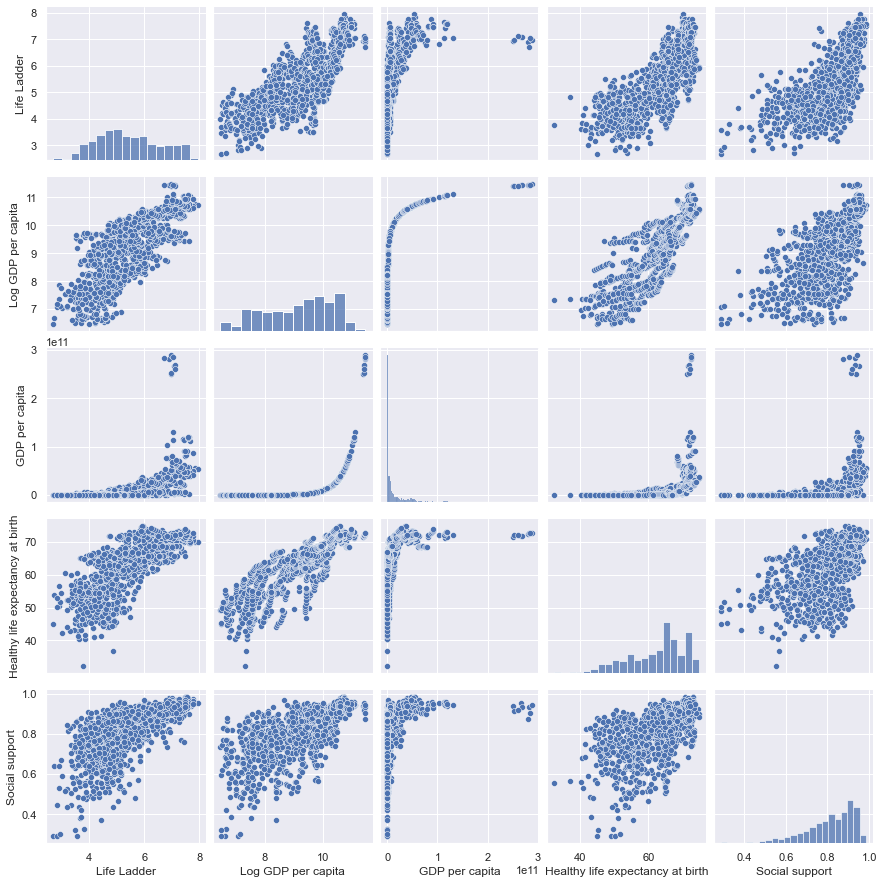

In [14]:
sns.pairplot(
    dataframe_clean, 
    x_vars=physical_wellbeing_features,
    y_vars=physical_wellbeing_features)

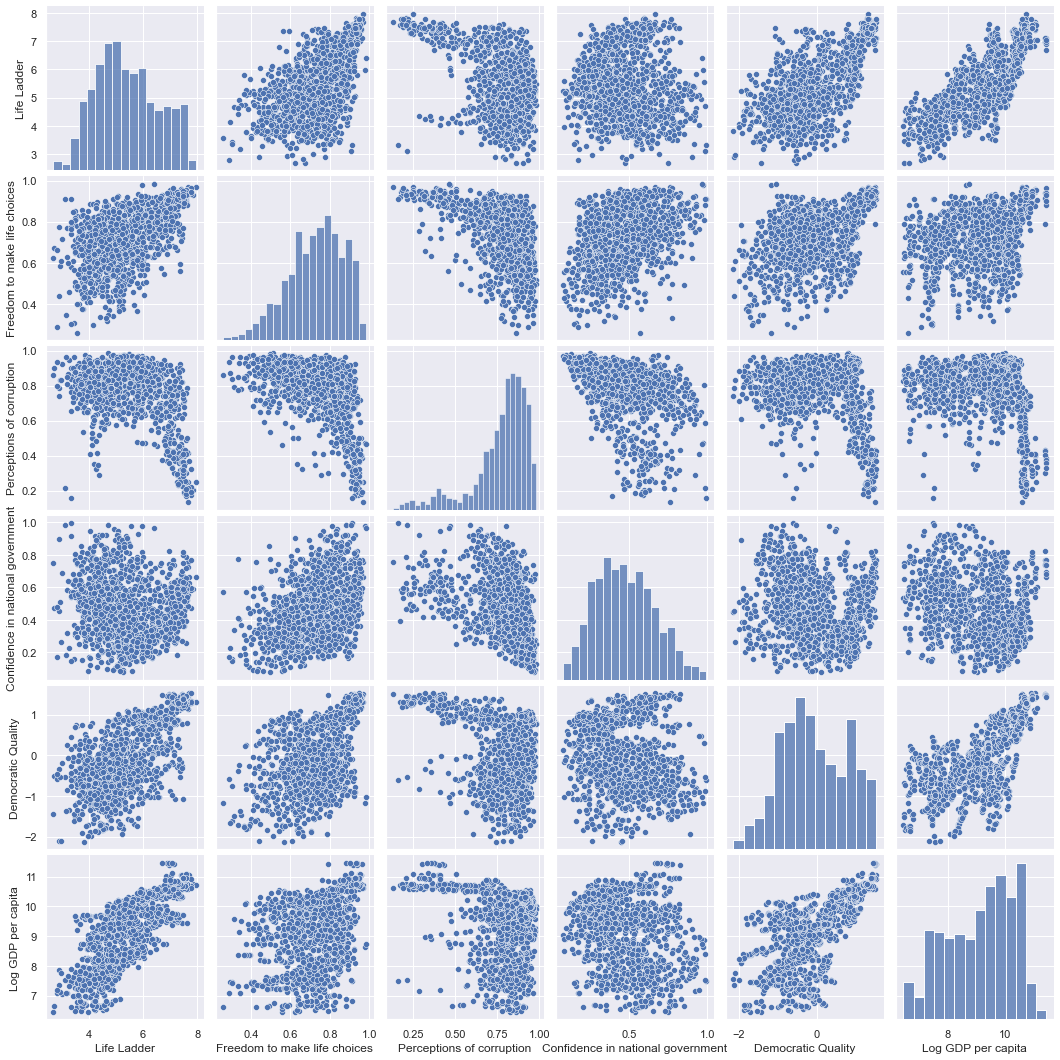

In [15]:
sns.pairplot(
    dataframe_clean, 
    x_vars=political_features,
    y_vars=political_features)

### 3.2. Investigate feature correlations

In [16]:
correlations = dataframe_clean.corr(method='pearson', min_periods=1)
correlations.style.background_gradient(cmap='coolwarm')

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
Year,1.000000,0.021070,0.083471,-0.017986,0.147469,0.171479,-0.004624,-0.091110,-0.004710,0.210793,-0.006945,0.036607,0.038997,0.287381,0.203631,-0.047086,0.070351
Life Ladder,0.021070,1.000000,0.779752,0.693571,0.757049,0.540454,0.238937,-0.460056,0.567840,-0.240897,-0.106654,0.630550,0.721818,-0.150654,-0.751862,-0.185161,0.529590
Log GDP per capita,0.083471,0.779752,1.000000,0.670775,0.849689,0.369620,0.011988,-0.330331,0.328116,-0.128877,-0.204936,0.689310,0.791857,-0.097340,-0.566411,-0.319260,0.563367
Social support,-0.017986,0.693571,0.670775,1.000000,0.601160,0.421893,0.101312,-0.213557,0.481929,-0.364791,-0.184987,0.553045,0.556992,-0.174385,-0.588437,-0.130002,0.379258
Healthy life expectancy at birth,0.147469,0.757049,0.849689,0.601160,1.000000,0.385716,0.058073,-0.311738,0.366337,-0.086426,-0.214318,0.623634,0.716220,-0.031958,-0.521400,-0.327668,0.449387
Freedom to make life choices,0.171479,0.540454,0.369620,0.421893,0.385716,1.000000,0.353395,-0.517491,0.597382,-0.269658,0.393649,0.489624,0.503981,-0.061016,-0.350515,0.022728,0.373846
Generosity,-0.004624,0.238937,0.011988,0.101312,0.058073,0.353395,1.000000,-0.312126,0.397953,-0.141453,0.251934,0.111139,0.210666,-0.174167,-0.207791,-0.089012,0.215610
Perceptions of corruption,-0.091110,-0.460056,-0.330331,-0.213557,-0.311738,-0.517491,-0.312126,1.000000,-0.326007,0.238101,-0.406837,-0.402297,-0.539252,0.274727,0.375995,0.225810,-0.544124
Positive affect,-0.004710,0.567840,0.328116,0.481929,0.366337,0.597382,0.397953,-0.326007,1.000000,-0.347081,0.127444,0.387710,0.373563,-0.037691,-0.393039,0.276444,0.259129
Negative affect,0.210793,-0.240897,-0.128877,-0.364791,-0.086426,-0.269658,-0.141453,0.238101,-0.347081,1.000000,-0.173644,-0.215805,-0.235989,0.512615,0.498160,0.130139,-0.193886


#### 3.2.1 Calculate correlations

In [17]:
correlations = dataframe_clean.corr(method='pearson', min_periods=1)
correlations = correlations.mask(np.tril(np.ones(correlations.shape)).astype(np.bool))
correlations

<ipython-input-17-4c45e1c12fbe>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correlations = correlations.mask(np.tril(np.ones(correlations.shape)).astype(np.bool))


,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
Year,NaN,0.02107,0.083471,-0.017986,0.147469,0.171479,-0.004624,-0.091110,-0.004710,0.210793,-0.006945,0.036607,0.038997,0.287381,0.203631,-0.047086,0.070351
Life Ladder,NaN,NaN,0.779752,0.693571,0.757049,0.540454,0.238937,-0.460056,0.567840,-0.240897,-0.106654,0.630550,0.721818,-0.150654,-0.751862,-0.185161,0.529590
Log GDP per capita,NaN,NaN,NaN,0.670775,0.849689,0.369620,0.011988,-0.330331,0.328116,-0.128877,-0.204936,0.689310,0.791857,-0.097340,-0.566411,-0.319260,0.563367
Social support,NaN,NaN,NaN,NaN,0.601160,0.421893,0.101312,-0.213557,0.481929,-0.364791,-0.184987,0.553045,0.556992,-0.174385,-0.588437,-0.130002,0.379258
Healthy life expectancy at birth,NaN,NaN,NaN,NaN,NaN,0.385716,0.058073,-0.311738,0.366337,-0.086426,-0.214318,0.623634,0.716220,-0.031958,-0.521400,-0.327668,0.449387
Freedom to make life choices,NaN,NaN,NaN,NaN,NaN,NaN,0.353395,-0.517491,0.597382,-0.269658,0.393649,0.489624,0.503981,-0.061016,-0.350515,0.022728,0.373846
Generosity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.312126,0.397953,-0.141453,0.251934,0.111139,0.210666,-0.174167,-0.207791,-0.089012,0.215610
Perceptions of corruption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.326007,0.238101,-0.406837,-0.402297,-0.539252,0.274727,0.375995,0.225810,-0.544124
Positive affect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.347081,0.127444,0.387710,0.373563,-0.037691,-0.393039,0.276444,0.259129
Negative affect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.173644,-0.215805,-0.235989,0.512615,0.498160,0.130139,-0.193886


#### 3.2.2. Drop duplicate correlation values and sort

In [18]:
correlation_list = correlations.unstack().dropna()
correlation_list

Life Ladder         Year                                                 0.021070
Log GDP per capita  Year                                                 0.083471
                    Life Ladder                                          0.779752
Social support      Year                                                -0.017986
                    Life Ladder                                          0.693571
                                                                           ...   
GDP per capita      Democratic Quality                                   0.548561
                    Delivery Quality                                     0.631854
                    Standard deviation of ladder by country-year        -0.267342
                    Standard deviation/Mean of ladder by country-year   -0.441882
                    GINI index (World Bank estimate), average 2000-16   -0.321644
Length: 136, dtype: float64

In [19]:
sorted_correlation_list = correlation_list.sort_values(kind="quicksort", ascending=False)
sorted_correlation_list

Delivery Quality                                   Democratic Quality           0.881405
Healthy life expectancy at birth                   Log GDP per capita           0.849689
Delivery Quality                                   Log GDP per capita           0.791857
Log GDP per capita                                 Life Ladder                  0.779752
Healthy life expectancy at birth                   Life Ladder                  0.757049
                                                                                  ...   
GDP per capita                                     Perceptions of corruption   -0.544124
Standard deviation/Mean of ladder by country-year  Log GDP per capita          -0.566411
                                                   Delivery Quality            -0.585125
                                                   Social support              -0.588437
                                                   Life Ladder                 -0.751862
Length: 136, dtype: f

### 3.3. Plan of what to look into:
#### 3.3.1. Development over time
#### 3.3.2. Interesting Decline:
1. Freedom to make life choices & perceptions of corruption

#### 3.3.3. Outliers (check how other feautures look for these observations):
1. Healthy life expectancy at birth & GDP
3. Social Support &  Healthy life expectancy at birth

#### 3.3.4. Cluster Analysis
1. Optional Principal Component Analysis
2. Group by country (Plot with the country as the hue)

## 4. Aggregating data, calculate additional data

### 4.1. Aggregate development of values over time

In [20]:
dataframe_over_time = dataframe_clean.groupby(['Year', 'Country name']).mean()
dataframe_over_time.head()

Life Ladder  Log GDP per capita  Social support  \
Year Country name                                                    
2005 Canada           7.418048           10.608347        0.961552   
2006 Argentina        6.312925            9.716692        0.938463   
     Armenia          4.289311            8.717719        0.681877   
     Austria          7.122211           10.657212        0.936350   
     Azerbaijan       4.727871            9.279043        0.854415   

                   Healthy life expectancy at birth  \
Year Country name                                     
2005 Canada                               71.300003   
2006 Argentina                            66.820000   
     Armenia                              64.800003   
     Austria                              70.760002   
     Azerbaijan                           61.880001   

                   Freedom to make life choices  Generosity  \
Year Country name                                             
2005 Canada                            0.957306    0.244575   
2006 Argentina                         0.733004   -0.152618   
     Armenia                           0.520198   -0.216674   
     Austria                           0.941382    0.300667   
     Azerbaijan                        0.771528   -0.253262   

                   Perceptions of corruption  Positive affect  \
Year Country name                                               
2005 Canada                         0.502681         0.838544   
2006 Argentina                      0.851799         0.824682   
     Armenia                        0.849513         0.494121   
     Austria                        0.490111         0.823105   
     Azerbaijan                     0.774117         0.511688   

                   Negative affect  Confidence in national government  \
Year Country name                                                       
2005 Canada               0.233278                           0.442818   
2006 Argentina            0.328230                           0.517504   
     Armenia              0.469419                           0.344337   
     Austria              0.173812                           0.497038   
     Azerbaijan           0.275695                           0.754707   

                   Democratic Quality  Delivery Quality  \
Year Country name                                         
2005 Canada                  1.168249          1.748819   
2006 Argentina               0.203246         -0.399083   
     Armenia                -0.502482         -0.296808   
     Austria                 1.224309          1.825915   
     Azerbaijan             -1.186661         -0.787893   

                   Standard deviation of ladder by country-year  \
Year Country name                                                 
2005 Canada                                            1.636804   
2006 Argentina                                         1.976832   
     Armenia                                           1.987946   
     Austria                                           1.760392   
     Azerbaijan                                        1.564968   

                   Standard deviation/Mean of ladder by country-year  \
Year Country name                                                      
2005 Canada                                                 0.220652   
2006 Argentina                                              0.313140   
     Armenia                                                0.463465   
     Austria                                                0.247169   
     Azerbaijan                                             0.331009   

                   GINI index (World Bank estimate), average 2000-16  \
Year Country name                                                      
2005 Canada                                                 0.336800   
2006 Argentina                                              0.460938   
     Armenia                                           

### 4.2. Find the countries with the biggest changes in life

In [21]:
life_ladder_change_rates = dataframe_over_time['Life Ladder'].diff().groupby('Country name').mean().sort_values()

#### Sort by absolute rate of change

In [22]:
life_ladder_change_rates.abs().sort_values(ascending=False)

Country name
Central African Republic    3.302256
Benin                       3.132055
Djibouti                    3.052678
Australia                   2.888599
Netherlands                 2.886186
                              ...   
Kyrgyzstan                  0.068212
Russia                      0.061184
Venezuela                   0.057881
Laos                        0.036947
Peru                        0.001962
Name: Life Ladder, Length: 134, dtype: float64

In [23]:
df_time = dataframe_over_time.reset_index()
df_time.head()

,Year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
0,2005,Canada,7.418048,10.608347,0.961552,71.300003,0.957306,0.244575,0.502681,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,0.336800,4.058326e+10
1,2006,Argentina,6.312925,9.716692,0.938463,66.820000,0.733004,-0.152618,0.851799,0.824682,0.328230,0.517504,0.203246,-0.399083,1.976832,0.313140,0.460938,5.208252e+09
2,2006,Armenia,4.289311,8.717719,0.681877,64.800003,0.520198,-0.216674,0.849513,0.494121,0.469419,0.344337,-0.502482,-0.296808,1.987946,0.463465,0.319250,5.220584e+08
3,2006,Austria,7.122211,10.657212,0.936350,70.760002,0.941382,0.300667,0.490111,0.823105,0.173812,0.497038,1.224309,1.825915,1.760392,0.247169,0.302692,4.541635e+10
4,2006,Azerbaijan,4.727871,9.279043,0.854415,61.880001,0.771528,-0.253262,0.774117,0.511688,0.275695,0.754707,-1.186661,-0.787893,1.564968,0.331009,0.211000,1.901267e+09


#### Look at several countries with the biggest changes in life ladder 

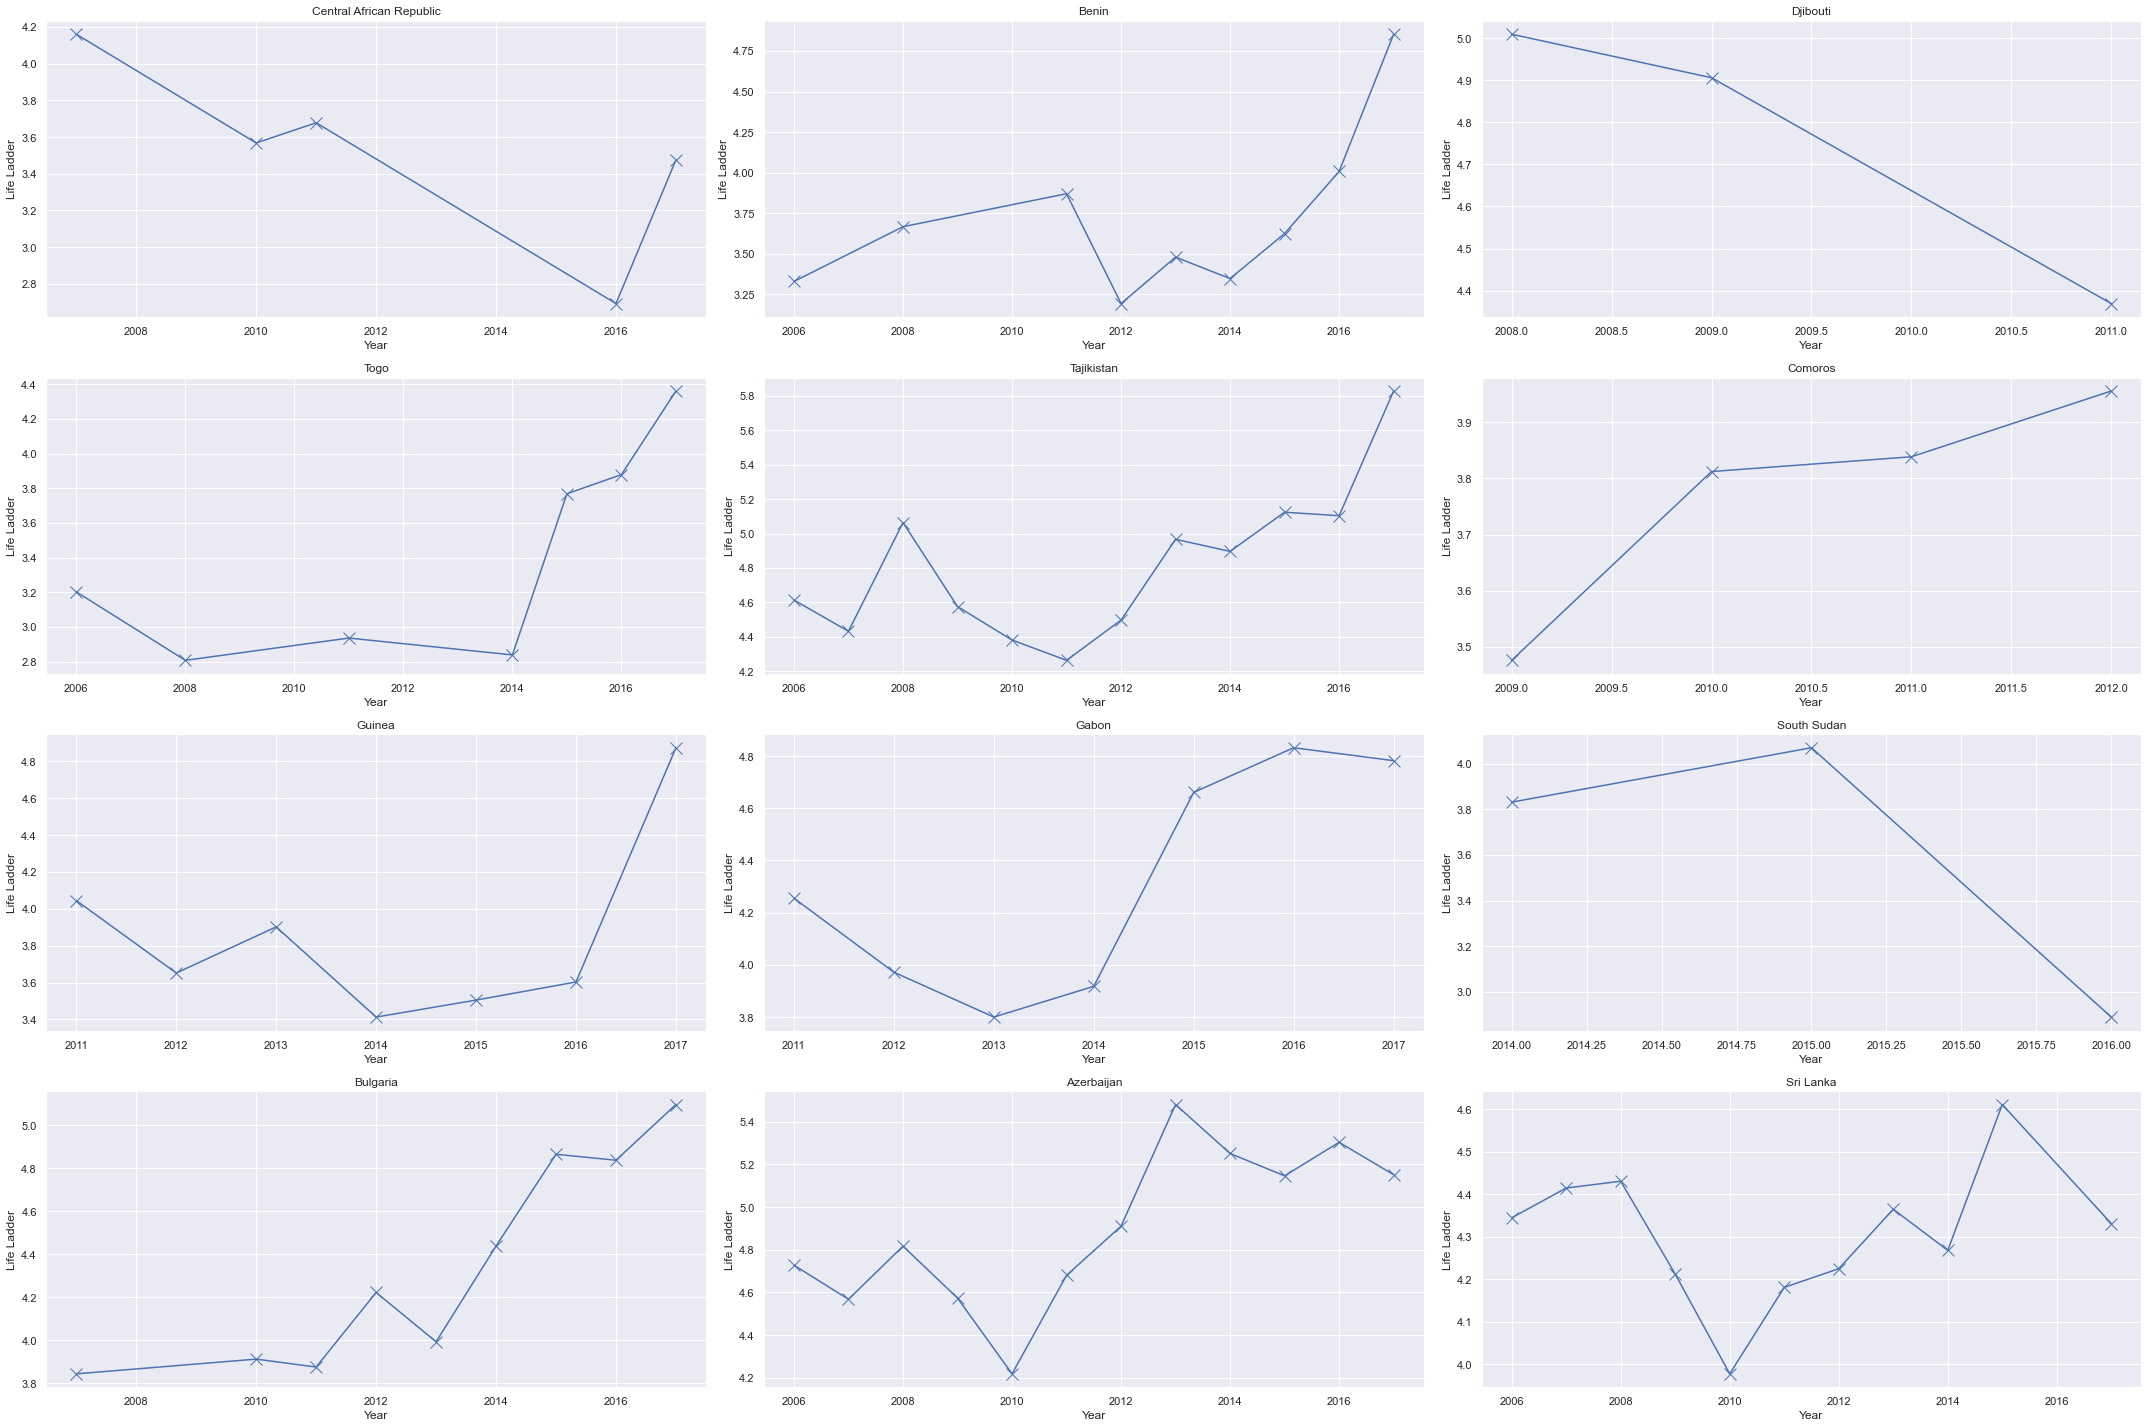

In [24]:
top_life_ladder_change_countries = life_ladder_change_rates.head(12)
num_plots = len(top_life_ladder_change_countries)

plot_columns = int(math.sqrt(num_plots))
plot_rows = int(math.ceil(num_plots / float(plot_columns)))

fig, axs = plt.subplots(plot_rows, plot_columns)
fig.set_size_inches(30, 20, forward=True)

for number,(index,item) in enumerate(life_ladder_change_rates.head(num_plots).items()):
    column = number % plot_columns
    row = int(number / plot_columns)
    
    df = df_time[df_time['Country name'] == index]
    axs[row, column].plot(
        df['Year'],
        df['Life Ladder'],
        label="test",
        marker='x',
        markersize=12)

    axs[row, column].set_title(index)
    axs[row, column].set_ylabel('Life Ladder')
    axs[row, column].set_xlabel('Year')

fig.tight_layout()
plt.show()

for big positive and negative changes, a look into the other features might be interesting to see which factors impacted the change 

### 4.2. Cluster values

Text(0.5, 1.0, 'Title')

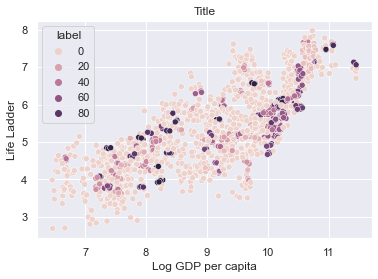

In [25]:
# outliers
from sklearn.cluster import DBSCAN
# life ladder and gdp
life_ladder_values = dataframe_clean['Life Ladder'].values
log_gdp_values = dataframe_clean['Log GDP per capita'].values

feature_vector = [[life_ladder_value, log_gdp_value] for life_ladder_value, log_gdp_value in zip(life_ladder_values, log_gdp_values)]

clustering = DBSCAN(eps=0.05, min_samples=3, metric="euclidean").fit(feature_vector)

d = {'Life Ladder': life_ladder_values, 'Log GDP per capita': log_gdp_values, 'label': clustering.labels_}
df_life_ladder_log_gdp = pd.DataFrame(data=d)

plot = sns.scatterplot(data=df_life_ladder_log_gdp , x="Log GDP per capita", y="Life Ladder", hue="label")
plt.title("Title")

## 5. Polished data visualisation

### 5.1. Development over time (features with biggest changes)

#### 5.1.1. Central African Republic 2007, 2016 and 2017

In [26]:
df_central_african_rep = df_time[df_time['Country name'] == 'Central African Republic']
df_car_2007 = df_central_african_rep[df_central_african_rep['Year'] == 2007]
df_car_2016 = df_central_african_rep[df_central_african_rep['Year'] == 2016]
df_car_2017 = df_central_african_rep[df_central_african_rep['Year'] == 2017]

car_2007_feauture_means = df_car_2007.mean()
car_2007_feauture_means = car_2007_feauture_means.rename('2007')
car_2016_feauture_means = df_car_2016.mean()
car_2016_feauture_means = car_2016_feauture_means.rename('2016')
car_2017_feauture_means = df_car_2017.mean()
car_2017_feauture_means = car_2017_feauture_means.rename('2017')

df_means = pd.concat([car_2007_feauture_means, car_2016_feauture_means, car_2017_feauture_means], axis=1)
df_means.drop(labels='Year', axis='rows', inplace=True)
df_means = df_means.T
df_means

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
2007,4.160130,6.753531,0.532297,40.900002,0.662871,0.094877,0.782131,0.567980,0.329995,0.623566,-1.468937,-1.397169,1.656170,0.398105,0.499,5.669314e+06
2016,2.693061,6.465948,0.290184,44.900002,0.624057,0.053440,0.859073,0.578654,0.494268,0.748755,-1.437883,-1.575128,2.250887,0.835810,0.499,2.923803e+06
2017,3.475862,6.494117,0.319589,45.200001,0.645252,0.093754,0.889566,0.613865,0.599335,0.650285,-1.523122,-1.538733,2.807074,0.807591,0.499,3.119728e+06


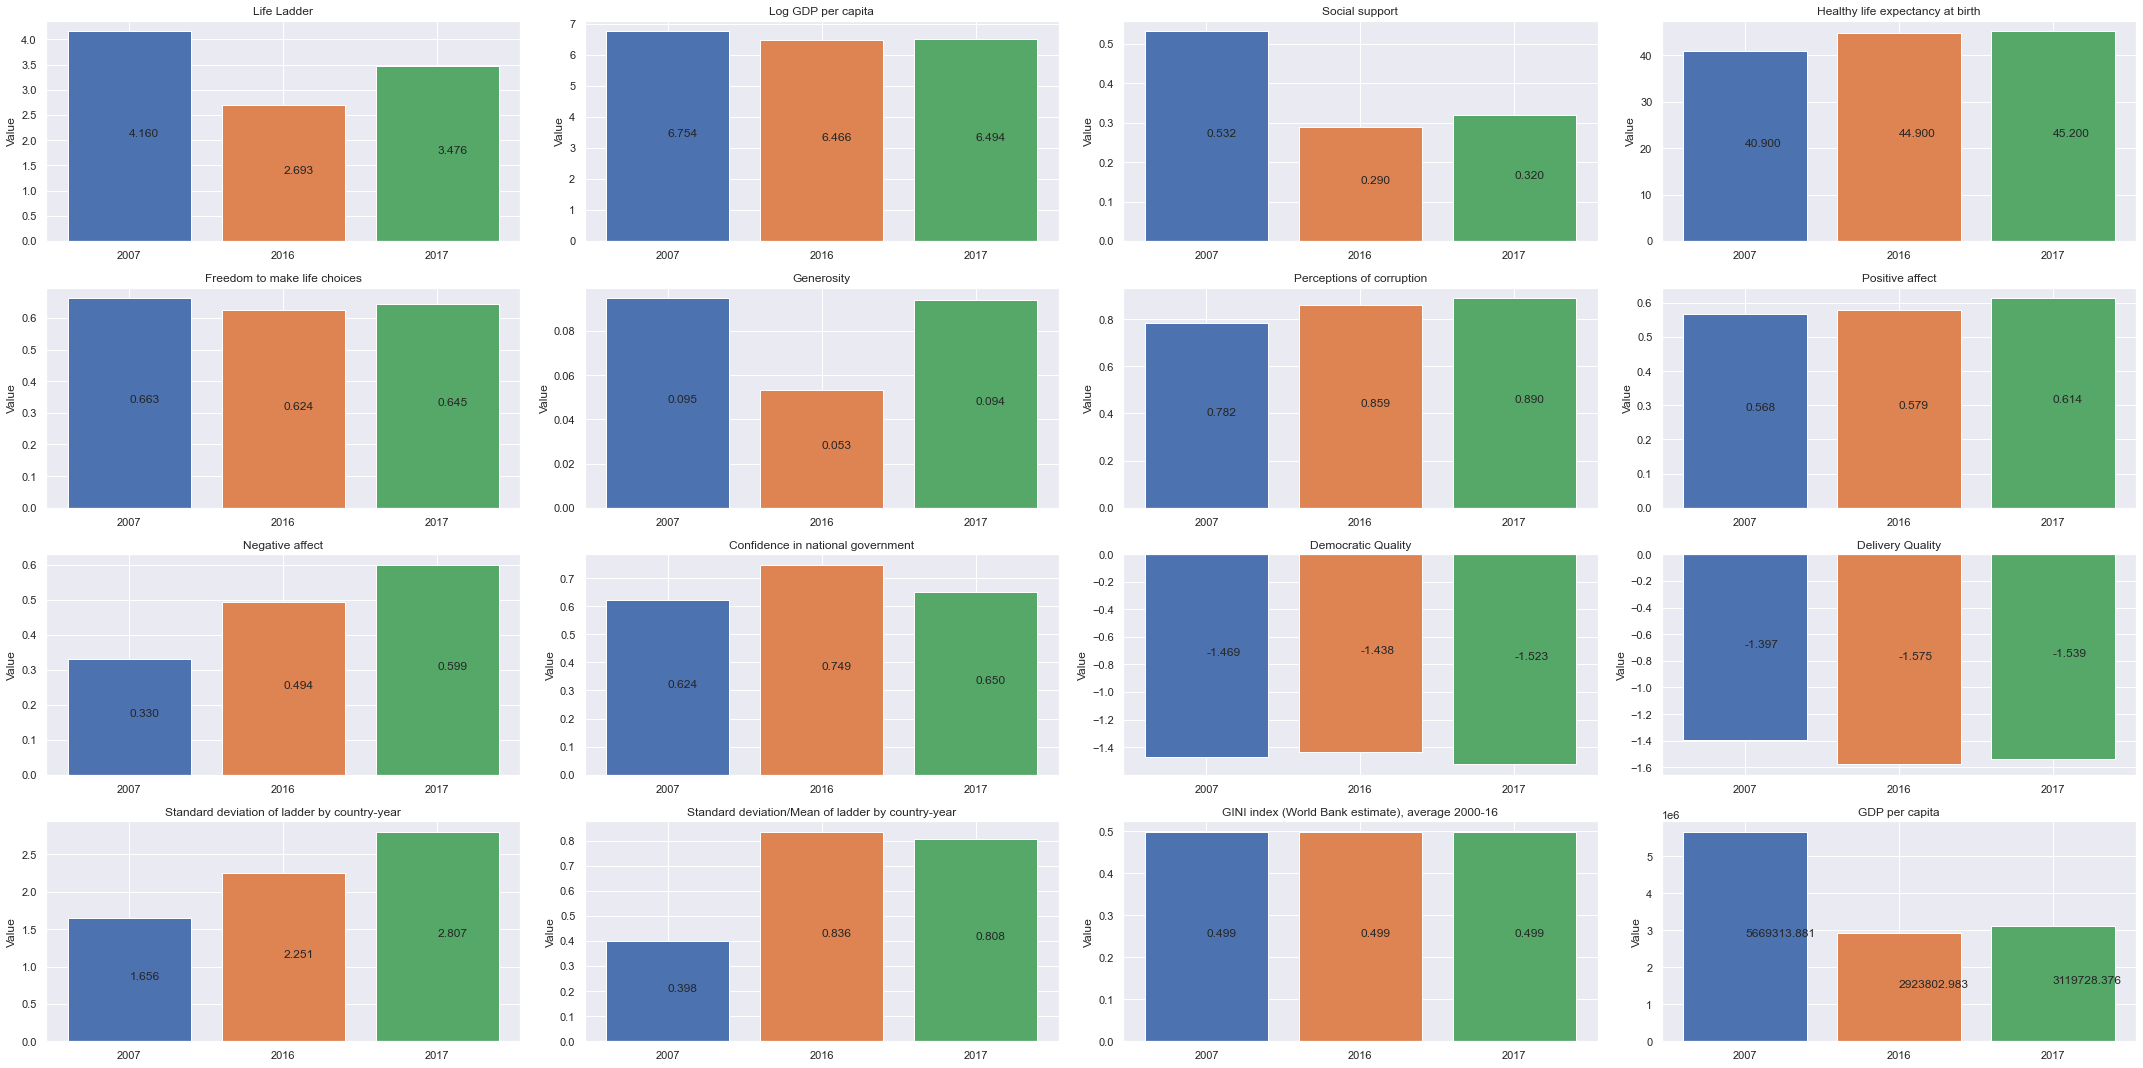

In [27]:
num_features = len(df_means.columns)

plot_columns = int(math.sqrt(num_features))
plot_rows = int(math.ceil(num_features / float(plot_columns)))

fig, axs = plt.subplots(plot_rows, plot_columns)
fig.set_size_inches(30, 15, forward=True)

for index in range(num_features):
    column = index % plot_columns
    row = int(index / plot_columns)
    
    label = df_means.columns[index]
    
    mean_2007 = car_2007_feauture_means[index+1] # +1 to skip year
    mean_2016 = car_2016_feauture_means[index+1] # +1 to skip year
    mean_2017 = car_2017_feauture_means[index+1] # +1 to skip year
    
    axs[row, column].bar(0, mean_2007, label='2007')
    axs[row, column].bar(1, mean_2016, label='2016')
    axs[row, column].bar(2, mean_2017, label='2017')
    
    axs[row, column].text(0, mean_2007/2, "{0:.3f}".format(mean_2007))
    axs[row, column].text(1, mean_2016/2, "{0:.3f}".format(mean_2016))
    axs[row, column].text(2, mean_2017/2, "{0:.3f}".format(mean_2017))
    axs[row, column].set_title(label)
    axs[row, column].set_ylabel('Value')
    axs[row, column].set_xticks([0,1,2])
    axs[row, column].set_xticklabels(['2007','2016', '2017'])

fig.tight_layout()
plt.show()

#### 5.1.2. Bulgaria 2007 to 2017

In [28]:
df_bulgaria = df_time[df_time['Country name'] == 'Bulgaria']
df_bulgaria_2007 = df_bulgaria[df_bulgaria['Year'] == 2007]
df_bulgaria_2017 = df_bulgaria[df_bulgaria['Year'] == 2017]

bulgaria_2007_feauture_means = df_bulgaria_2007.mean()
bulgaria_2007_feauture_means = bulgaria_2007_feauture_means.rename('2007')
bulgaria_2017_feauture_means = df_bulgaria_2017.mean()
bulgaria_2017_feauture_means = bulgaria_2017_feauture_means.rename('2017')

df_means = pd.concat([bulgaria_2007_feauture_means, bulgaria_2017_feauture_means], axis=1)
df_means.drop(labels='Year', axis='rows', inplace=True)
df_means = df_means.T
df_means

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
2007,3.843798,9.579362,0.831508,65.099998,0.565787,-0.139648,0.976061,0.594433,0.226256,0.275432,0.524608,0.097927,1.945167,0.506053,0.354667,3.796312e+09
2017,5.096902,9.828942,0.941755,66.599998,0.689047,-0.156459,0.910800,0.614217,0.188637,0.326088,0.375987,0.171330,1.852364,0.363429,0.354667,6.744384e+09


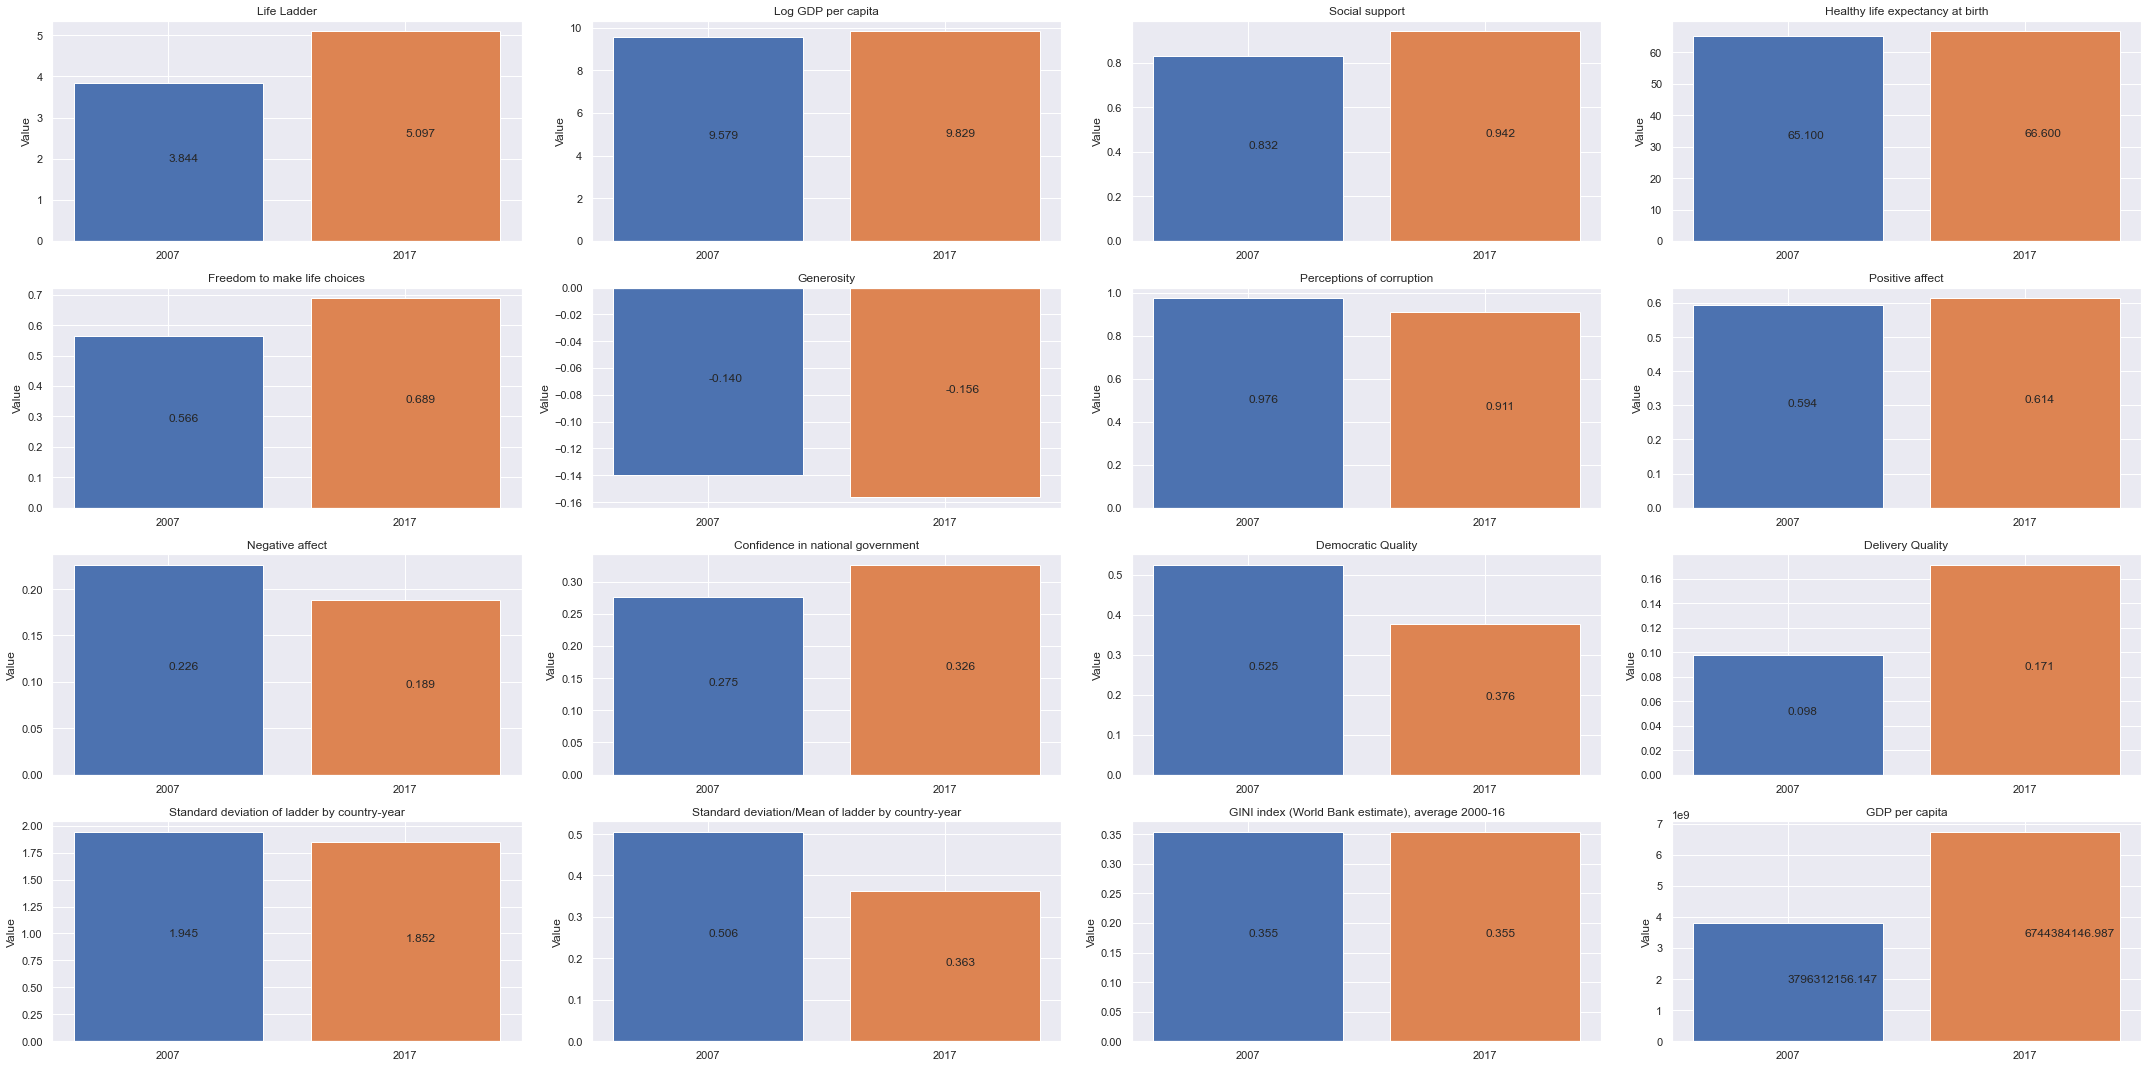

In [29]:
num_features = len(df_means.columns)

plot_columns = int(math.sqrt(num_features))
plot_rows = int(math.ceil(num_features / float(plot_columns)))

fig, axs = plt.subplots(plot_rows, plot_columns)
fig.set_size_inches(30, 15, forward=True)

for index in range(num_features):
    column = index % plot_columns
    row = int(index / plot_columns)
    
    label = df_means.columns[index]
    mean_2007 = bulgaria_2007_feauture_means[index+1] # +1 to skip year
    mean_2017 = bulgaria_2017_feauture_means[index+1] # +1 to skip year
        
    axs[row, column].bar(0, mean_2007, label='2007')
    axs[row, column].bar(1, mean_2017, label='2017')
    
    axs[row, column].text(0, mean_2007/2, "{0:.3f}".format(mean_2007))
    axs[row, column].text(1, mean_2017/2, "{0:.3f}".format(mean_2017))
    axs[row, column].set_title(label)
    axs[row, column].set_ylabel('Value')
    axs[row, column].set_xticks([0,1])
    axs[row, column].set_xticklabels(['2007', '2017'])

fig.tight_layout()
plt.show()

#### 5.1.3 Gabon 2014 to 2015

In [30]:
df_gabon = df_time[df_time['Country name'] == 'Gabon']
df_gabon_2014 = df_gabon[df_gabon['Year'] == 2014]
df_gabon_2015 = df_gabon[df_gabon['Year'] == 2015]

gabon_2014_feauture_means = df_gabon_2014.mean()
gabon_2014_feauture_means = gabon_2014_feauture_means.rename('2014')
gabon_2015_feauture_means = df_gabon_2015.mean()
gabon_2015_feauture_means = gabon_2015_feauture_means.rename('2015')

df_means = pd.concat([gabon_2014_feauture_means, gabon_2015_feauture_means], axis=1)
df_means.drop(labels='Year', axis='rows', inplace=True)
df_means = df_means.T
df_means

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
2014,3.918073,9.721884,0.828597,57.520000,0.606614,-0.215491,0.781658,0.539161,0.293042,0.318829,-0.358090,-0.659413,1.919495,0.489908,0.422,5.270888e+09
2015,4.661013,9.731321,0.755862,58.200001,0.671301,-0.211467,0.866777,0.626362,0.371656,0.370059,-0.436461,-0.698703,2.078256,0.445881,0.422,5.386682e+09


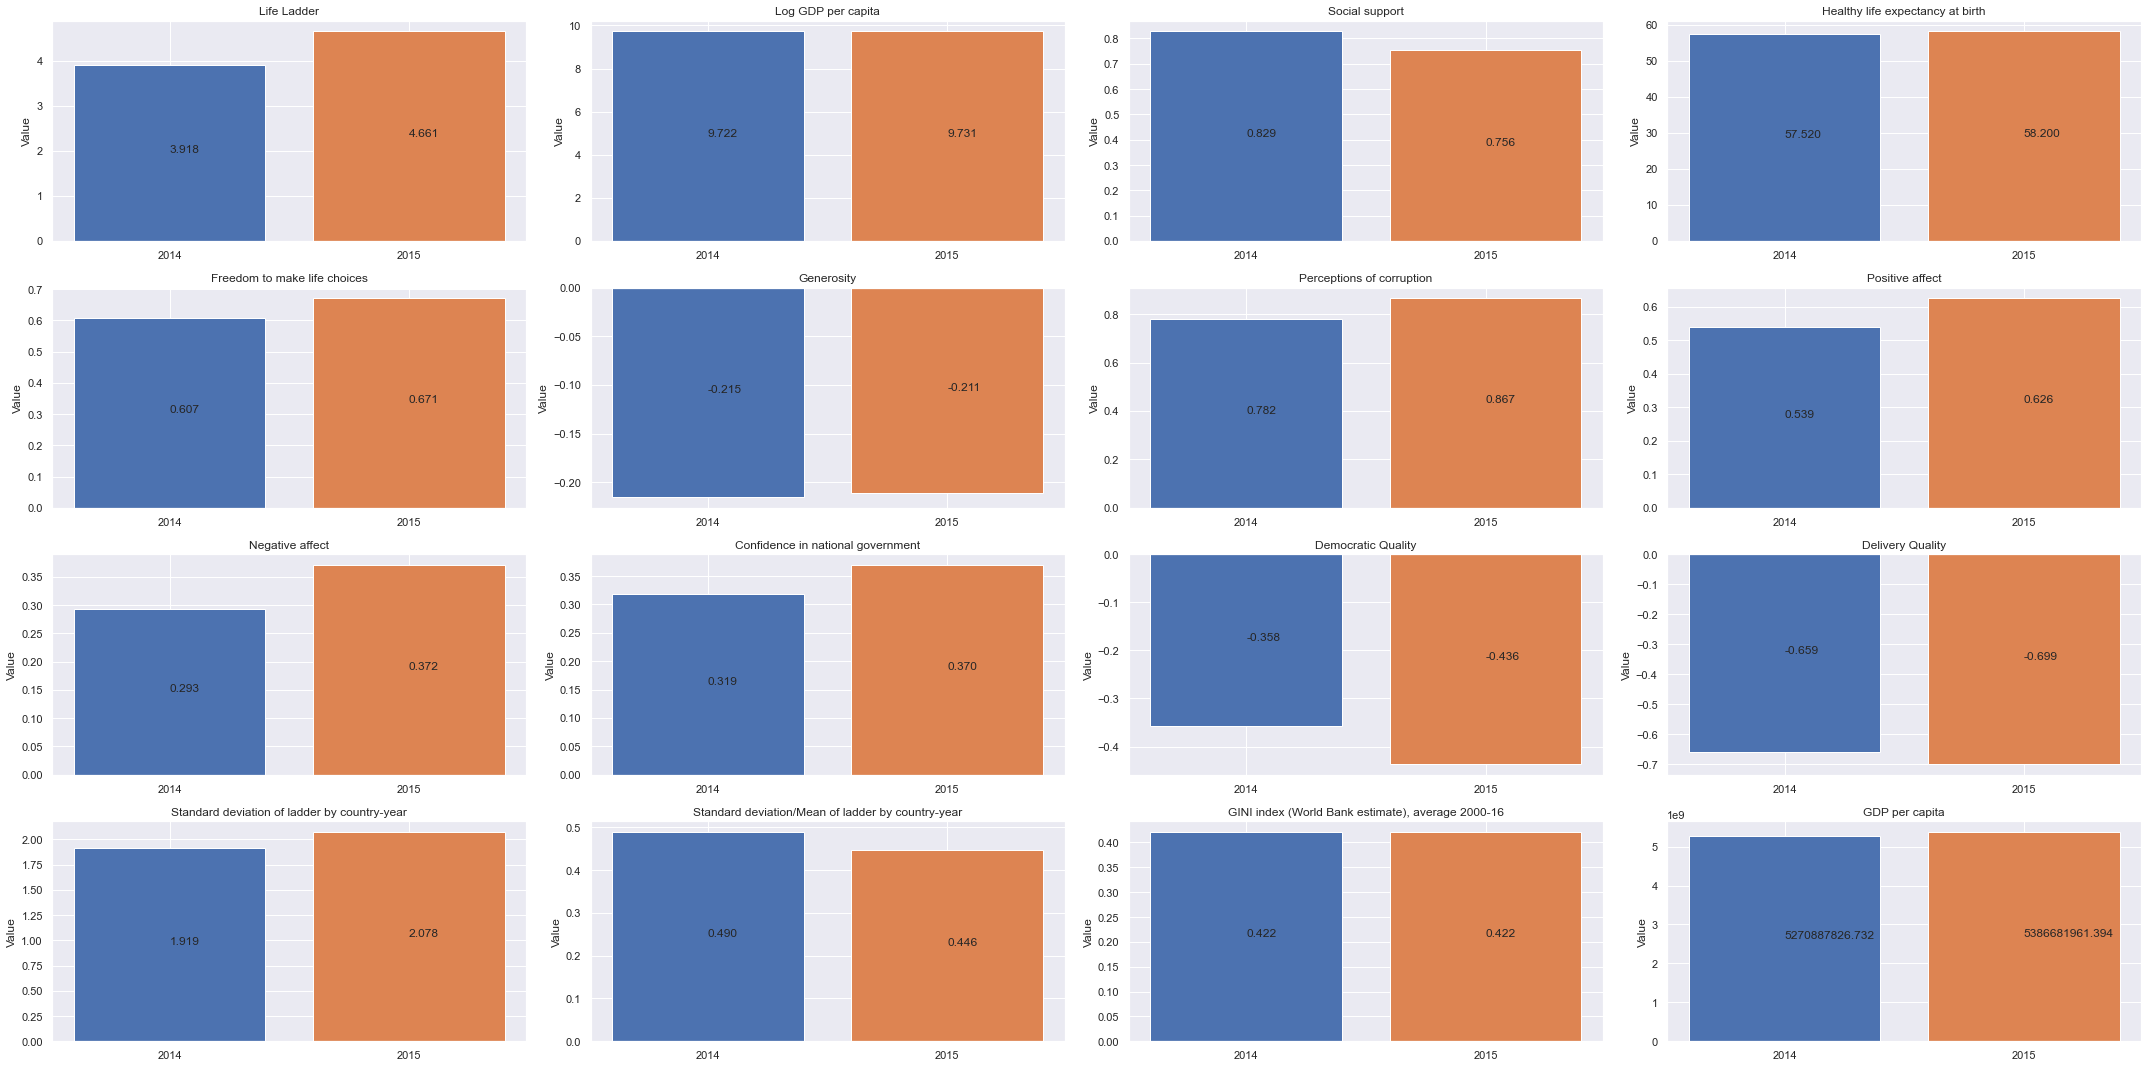

In [31]:
num_features = len(df_means.columns)

plot_columns = int(math.sqrt(num_features))
plot_rows = int(math.ceil(num_features / float(plot_columns)))

fig, axs = plt.subplots(plot_rows, plot_columns)
fig.set_size_inches(30, 15, forward=True)

for index in range(num_features):
    column = index % plot_columns
    row = int(index / plot_columns)
    
    label = df_means.columns[index]
    mean_2014 = gabon_2014_feauture_means[index+1] # +1 to skip year
    mean_2015 = gabon_2015_feauture_means[index+1] # +1 to skip year
        
    axs[row, column].bar(0, mean_2014, label='2014')
    axs[row, column].bar(1, mean_2015, label='2015')
    
    axs[row, column].text(0, mean_2014/2, "{0:.3f}".format(mean_2014))
    axs[row, column].text(1, mean_2015/2, "{0:.3f}".format(mean_2015))
    axs[row, column].set_title(label)
    axs[row, column].set_ylabel('Value')
    axs[row, column].set_xticks([0,1])
    axs[row, column].set_xticklabels(['2014', '2015'])

fig.tight_layout()
plt.show()

#### 5.1.4 Benin 2011 to 2012

In [49]:
df_benin = df_time[df_time['Country name'] == 'Benin']
df_benin_2011 = df_benin[df_benin['Year'] == 2011]
df_benin_2012 = df_benin[df_benin['Year'] == 2012]

benin_2011_feauture_means = df_benin_2011.mean()
benin_2011_feauture_means = benin_2011_feauture_means.rename('2011')
benin_2012_feauture_means = df_benin_2012.mean()
benin_2012_feauture_means = benin_2012_feauture_means.rename('2012')

df_means = pd.concat([benin_2011_feauture_means, benin_2012_feauture_means], axis=1)
df_means.drop(labels='Year', axis='rows', inplace=True)
df_means = df_means.T
df_means

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
2011,3.870280,7.507083,0.477494,51.980000,0.772919,-0.119084,0.849472,0.625820,0.218678,0.77715,0.242373,-0.537246,1.694988,0.437950,0.432667,3.214278e+07
2012,3.193469,7.526154,0.523027,52.259998,0.768971,-0.088222,0.805978,0.582524,0.230665,0.58208,0.244427,-0.584024,1.640371,0.513664,0.432667,3.358564e+07


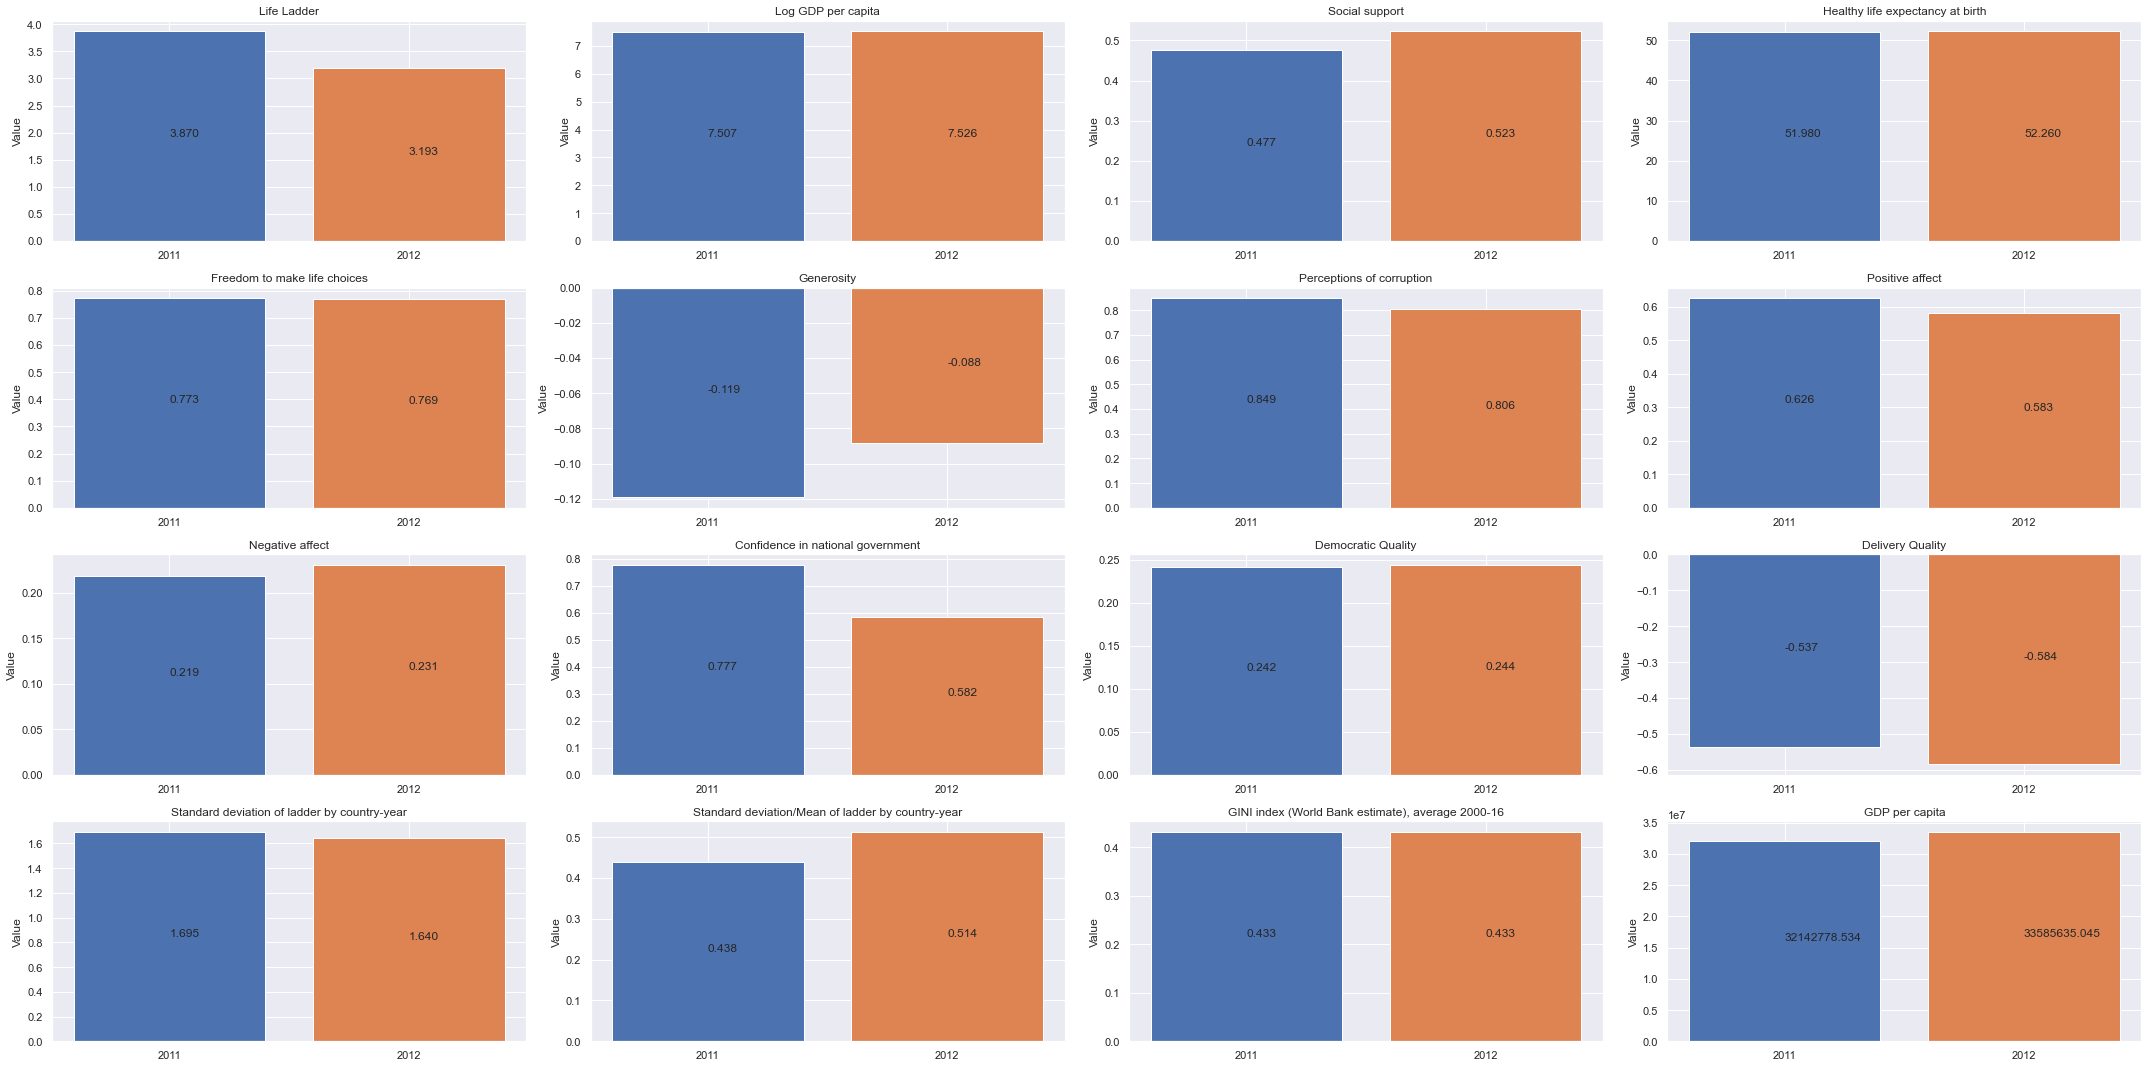

In [50]:
num_features = len(df_means.columns)

plot_columns = int(math.sqrt(num_features))
plot_rows = int(math.ceil(num_features / float(plot_columns)))

fig, axs = plt.subplots(plot_rows, plot_columns)
fig.set_size_inches(30, 15, forward=True)

for index in range(num_features):
    column = index % plot_columns
    row = int(index / plot_columns)
    
    label = df_means.columns[index]
    mean_2011 = benin_2011_feauture_means[index+1] # +1 to skip year
    mean_2012 = benin_2012_feauture_means[index+1] # +1 to skip year
        
    axs[row, column].bar(0, mean_2011, label='2011')
    axs[row, column].bar(1, mean_2012, label='2012')
    
    axs[row, column].text(0, mean_2011/2, "{0:.3f}".format(mean_2011))
    axs[row, column].text(1, mean_2012/2, "{0:.3f}".format(mean_2012))
    axs[row, column].set_title(label)
    axs[row, column].set_ylabel('Value')
    axs[row, column].set_xticks([0,1])
    axs[row, column].set_xticklabels(['2011', '2012'])

fig.tight_layout()
plt.show()

### 5.2. Decline: Freedom to make life choices & perceptions of corruption

Text(0.5, 1.0, 'Correlation: -0.517491')

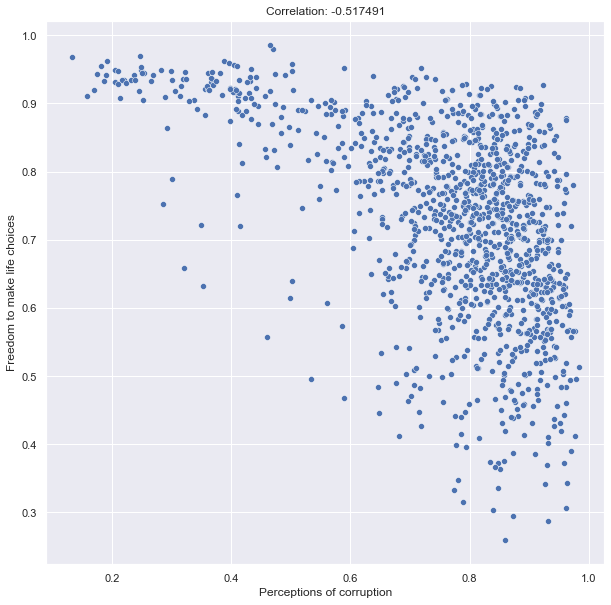

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
plot = sns.scatterplot(
    ax=ax,
    data=dataframe_clean,
    x="Perceptions of corruption",
    y="Freedom to make life choices")
title_string = "Correlation: {:3f}".format(sorted_correlation_list['Perceptions of corruption']['Freedom to make life choices'])
plt.title(title_string)

#### No further investigation of this

### 5.3. Outliers
####  5.3.1. Healthy life expectancy at birth & log gdp

Text(0.5, 1.0, 'Correlation: 0.449387')

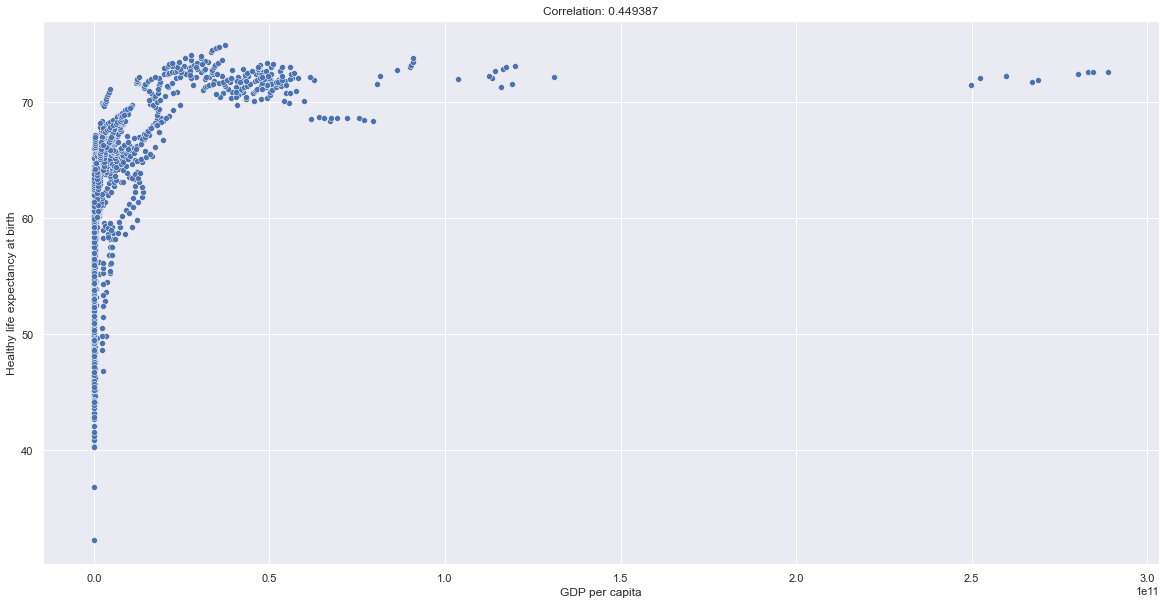

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
plot = sns.scatterplot(
    ax=ax,
    data=dataframe_clean,
    x="GDP per capita",
    y="Healthy life expectancy at birth")
title_string = "Correlation: {:3f}".format(sorted_correlation_list['GDP per capita']['Healthy life expectancy at birth'])
plt.title(title_string)

#### Show entries with GDP bigger than 20e11

In [34]:
df_high_gdp_decline_health = dataframe_clean[dataframe_clean['GDP per capita'] > 200000000000]
df_high_gdp_decline_health

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
886,Luxembourg,2009,6.957920,11.397500,0.938559,71.440002,0.939102,0.121556,0.431607,0.799493,0.238022,0.824018,1.502807,1.798500,1.606239,0.230850,0.316077,2.497469e+11
887,Luxembourg,2010,7.097252,11.426749,0.952372,71.699997,0.908303,0.090344,0.423341,0.808783,0.216064,0.768445,1.518027,1.824003,1.675736,0.236111,0.316077,2.671463e+11
888,Luxembourg,2011,7.101400,11.429599,0.934091,71.879997,0.961831,0.100355,0.388171,0.836459,0.200137,0.770687,1.460983,1.901750,1.565813,0.220494,0.316077,2.689050e+11
889,Luxembourg,2012,6.964097,11.402052,0.913908,72.059998,0.916521,0.053239,0.402753,0.815249,0.227412,0.743671,1.490910,1.840276,1.782285,0.255925,0.316077,2.523783e+11
890,Luxembourg,2013,7.130809,11.414831,0.916683,72.239998,0.789655,-0.059715,0.300812,0.640380,0.184800,0.736690,1.483172,1.837526,1.342208,0.188227,0.316077,2.599149e+11
891,Luxembourg,2014,6.891127,11.447376,0.875469,72.419998,0.937988,0.099279,0.366287,0.803084,0.170409,0.662738,1.466503,1.816250,1.539558,0.223412,0.316077,2.801407e+11
892,Luxembourg,2015,6.701571,11.451992,0.933605,72.599998,0.932256,0.046508,0.375390,0.757445,0.193050,0.694678,1.493053,1.838430,1.505816,0.224696,0.316077,2.831340e+11
893,Luxembourg,2016,6.967341,11.460800,0.941261,72.599998,0.882365,0.014104,0.356336,0.757950,0.192301,0.678978,1.459813,1.817983,1.389065,0.199368,0.316077,2.889350e+11
894,Luxembourg,2017,7.061381,11.454002,0.905436,72.599998,0.902822,0.039555,0.330174,0.765817,0.184467,0.738922,1.428659,1.774406,1.424476,0.201728,0.316077,2.844477e+11


#### Compare entries to mean of complete dataframe

In [35]:
df_high_gdp_decline_health.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,2013.000000,6.985878,11.431656,0.923487,72.171110,0.907871,0.056136,0.374986,0.776073,0.200740,0.735425,1.478214,1.827680,1.536800,0.220090,0.316077,2.705276e+11
std,2.738613,0.134100,0.023356,0.023350,0.428965,0.050143,0.055712,0.042460,0.057795,0.022095,0.050490,0.026982,0.034974,0.140759,0.020829,0.000000,1.445626e+10
min,2009.000000,6.701571,11.397500,0.875469,71.440002,0.789655,-0.059715,0.300812,0.640380,0.170409,0.662738,1.428659,1.774406,1.342208,0.188227,0.316077,2.497469e+11
25%,2011.000000,6.957920,11.414831,0.913908,71.879997,0.902822,0.039555,0.356336,0.757950,0.184800,0.694678,1.460983,1.816250,1.424476,0.201728,0.316077,2.599149e+11
50%,2013.000000,6.967341,11.429599,0.933605,72.239998,0.916521,0.053239,0.375390,0.799493,0.193050,0.738922,1.483172,1.824003,1.539558,0.223412,0.316077,2.689050e+11
75%,2015.000000,7.097252,11.451992,0.938559,72.599998,0.937988,0.099279,0.402753,0.808783,0.216064,0.768445,1.493053,1.838430,1.606239,0.230850,0.316077,2.831340e+11
max,2017.000000,7.130809,11.460800,0.952372,72.599998,0.961831,0.121556,0.431607,0.836459,0.238022,0.824018,1.518027,1.901750,1.782285,0.255925,0.316077,2.889350e+11


In [54]:
luxemburg_feauture_means = df_high_gdp_decline_health.mean()
luxemburg_feauture_means = luxemburg_feauture_means.rename('Luxemburg')
world_feature_means = dataframe_clean.mean()
world_feature_means = world_feature_means.rename('World')

df_means = pd.concat([luxemburg_feauture_means, world_feature_means], axis=1)
df_means.drop(labels='Year', axis='rows', inplace=True)
df_means = df_means.T
df_means

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
Luxemburg,6.985878,11.431656,0.923487,72.171110,0.907871,0.056136,0.374986,0.776073,0.200740,0.735425,1.478214,1.827680,1.536800,0.22009,0.316077,2.705276e+11
World,5.412620,9.133374,0.808949,62.579605,0.725588,0.001112,0.768365,0.710507,0.261299,0.473349,-0.064386,-0.006149,2.007357,0.39035,0.388690,1.293997e+10


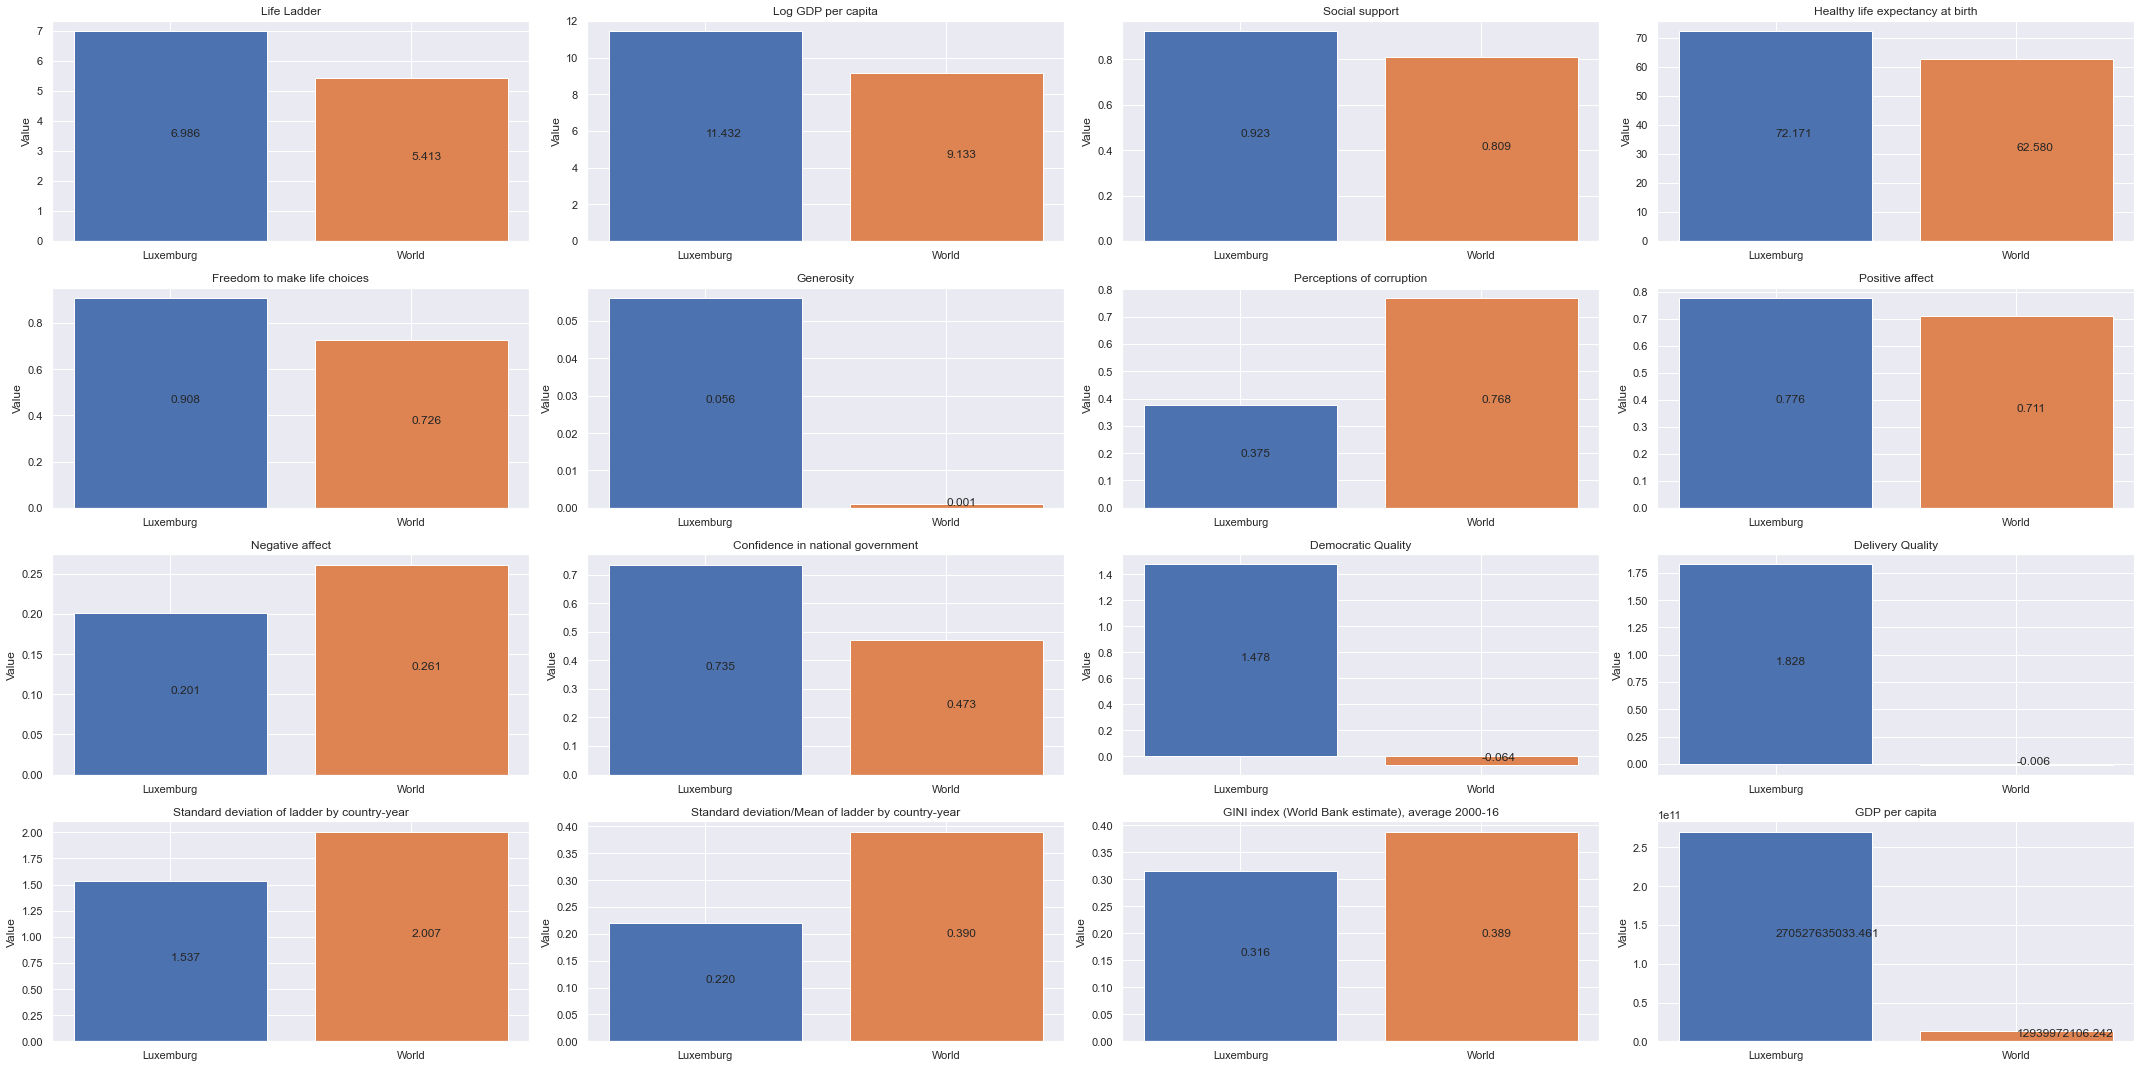

In [55]:
num_features = len(df_means.columns)

plot_columns = int(math.sqrt(num_features))
plot_rows = int(math.ceil(num_features / float(plot_columns)))

fig, axs = plt.subplots(plot_rows, plot_columns)
fig.set_size_inches(30, 15, forward=True)

for index in range(num_features):
    column = index % plot_columns
    row = int(index / plot_columns)
    
    label = df_means.columns[index]
    luxemburg_mean = luxemburg_feauture_means[index+1] # +1 to skip year
    world_mean = world_feature_means[index+1] # +1 to skip year
        
    axs[row, column].bar(0, luxemburg_mean, label='Luxemburg')
    axs[row, column].bar(1, world_mean, label='World')
    
    axs[row, column].text(0, luxemburg_mean/2, "{0:.3f}".format(luxemburg_mean))
    axs[row, column].text(1, world_mean/2, "{0:.3f}".format(world_mean))
    axs[row, column].set_title(label)
    axs[row, column].set_ylabel('Value')
    axs[row, column].set_xticks([0,1])
    axs[row, column].set_xticklabels(['Luxemburg', 'World'])

fig.tight_layout()
plt.show()

#### Show countries (and their feature values) with higher Healthy life expectancy at birth than Luxemburg's mean

In [38]:
luxemburg_feauture_means = df_high_gdp_decline_health.mean()
luxemburg_life_expectancy_mean = df_high_gdp_decline_health['Healthy life expectancy at birth'].mean()
df_healthier_than_luxemburg = dataframe_clean[dataframe_clean['Healthy life expectancy at birth'] > luxemburg_life_expectancy_mean]
healthier_than_luxemburg_means = df_healthier_than_luxemburg.mean()

In [39]:
luxemburg_feauture_means = df_high_gdp_decline_health.mean()
luxemburg_feauture_means = luxemburg_feauture_means.rename('Luxemburg')
luxemburg_life_expectancy_mean = df_high_gdp_decline_health['Healthy life expectancy at birth'].mean()

df_healthier_than_luxemburg = dataframe_clean[dataframe_clean['Healthy life expectancy at birth'] > luxemburg_life_expectancy_mean]
contries_healthier_than_luxemburg_feature_means = df_healthier_than_luxemburg.mean()
contries_healthier_than_luxemburg_feature_means = contries_healthier_than_luxemburg_feature_means.rename('Healther than Lx.')

df_means = pd.concat([luxemburg_feauture_means, contries_healthier_than_luxemburg_feature_means], axis=1)
df_means.drop(labels='Year', axis='rows', inplace=True)
df_means = df_means.T

df_means

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
Luxemburg,6.985878,11.431656,0.923487,72.171110,0.907871,0.056136,0.374986,0.776073,0.200740,0.735425,1.478214,1.827680,1.536800,0.220090,0.316077,2.705276e+11
Healther than Lx.,6.750721,10.607513,0.907592,72.896756,0.814109,0.069375,0.638338,0.761610,0.251271,0.435916,0.922616,1.347785,1.822654,0.275615,0.328310,5.270325e+10


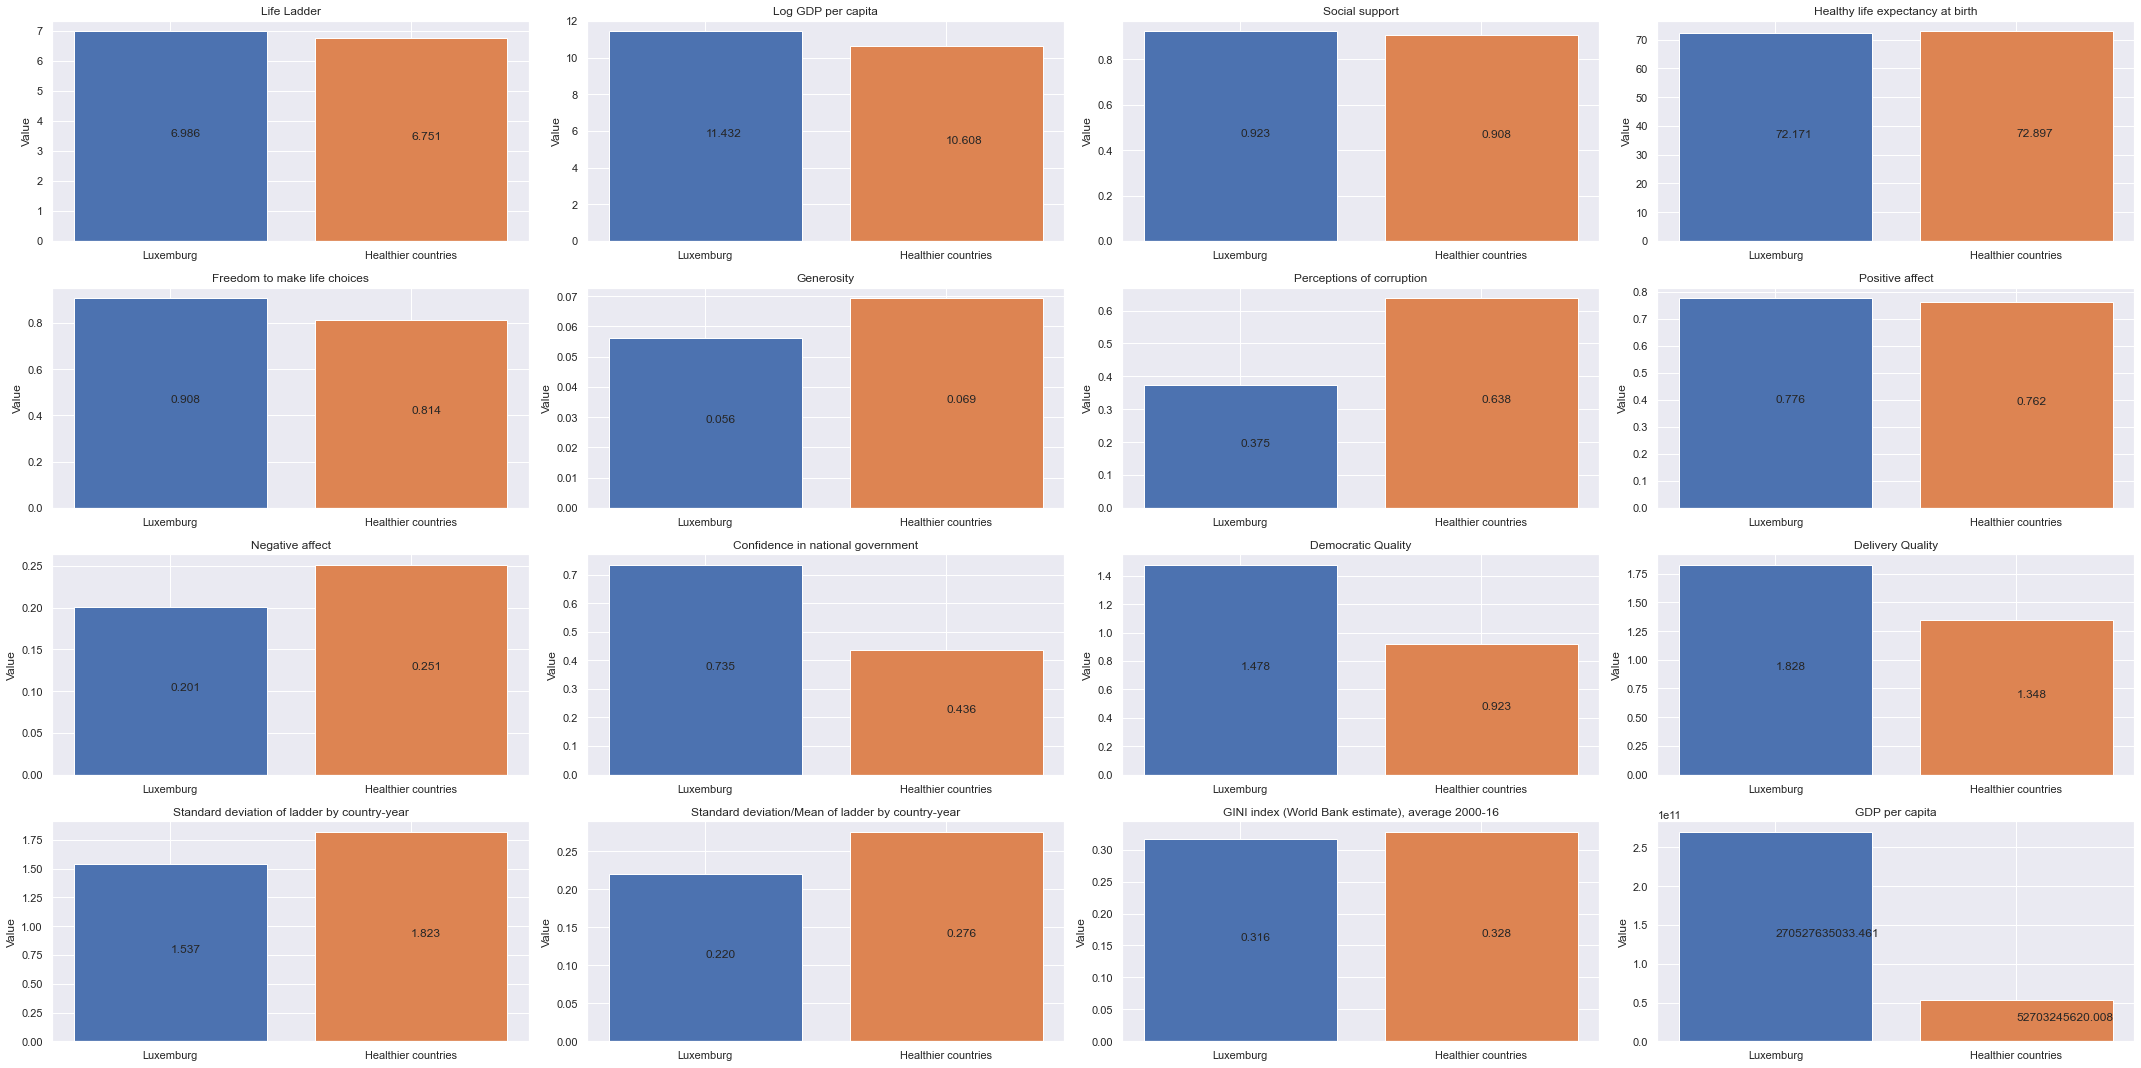

In [40]:
num_features = len(df_means.columns)
sns.set()

plot_columns = int(math.sqrt(num_features))
plot_rows = int(math.ceil(num_features / float(plot_columns)))

fig, axs = plt.subplots(plot_rows, plot_columns)
fig.set_size_inches(30, 15, forward=True)

for index in range(num_features):
    column = index % plot_columns
    row = int(index / plot_columns)
    
    label = df_means.columns[index]
    luxemburg_mean = luxemburg_feauture_means[index+1] # +1 to skip year
    other_country_mean = contries_healthier_than_luxemburg_feature_means[index+1] # +1 to skip year
        
    axs[row, column].bar(0, luxemburg_mean, label='Luxemburg')
    axs[row, column].bar(1, other_country_mean, label='Healthier countries')
    
    axs[row, column].text(0, luxemburg_mean/2, "{0:.3f}".format(luxemburg_mean))
    axs[row, column].text(1, other_country_mean/2, "{0:.3f}".format(other_country_mean))
    axs[row, column].set_title(label)
    axs[row, column].set_ylabel('Value')
    axs[row, column].set_xticks([0,1])
    axs[row, column].set_xticklabels(['Luxemburg', 'Healthier countries'])

fig.tight_layout()
plt.show()

#### Show entries with Healthy life expectancy at birth smaller than 40

In [41]:
df_gpd_low_health = dataframe_clean[dataframe_clean['Healthy life expectancy at birth'] < 40]
df_gpd_low_health

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
593,Haiti,2010,3.765999,7.314575,0.554031,32.299999,0.372941,0.215969,0.848007,0.55496,0.292557,0.156371,-0.825914,-1.303879,1.559756,0.414168,0.411,2.063359e+07
594,Haiti,2011,4.844574,7.353901,0.567039,36.860001,0.412588,0.242826,0.681960,0.62524,0.244856,0.456668,-0.869596,-1.339227,1.731062,0.357320,0.411,2.258920e+07


#### Show development of life expectancy for Haiti over the time

Text(0.5, 1.0, 'Annual Healthy life expectancy at birth in Haiti')

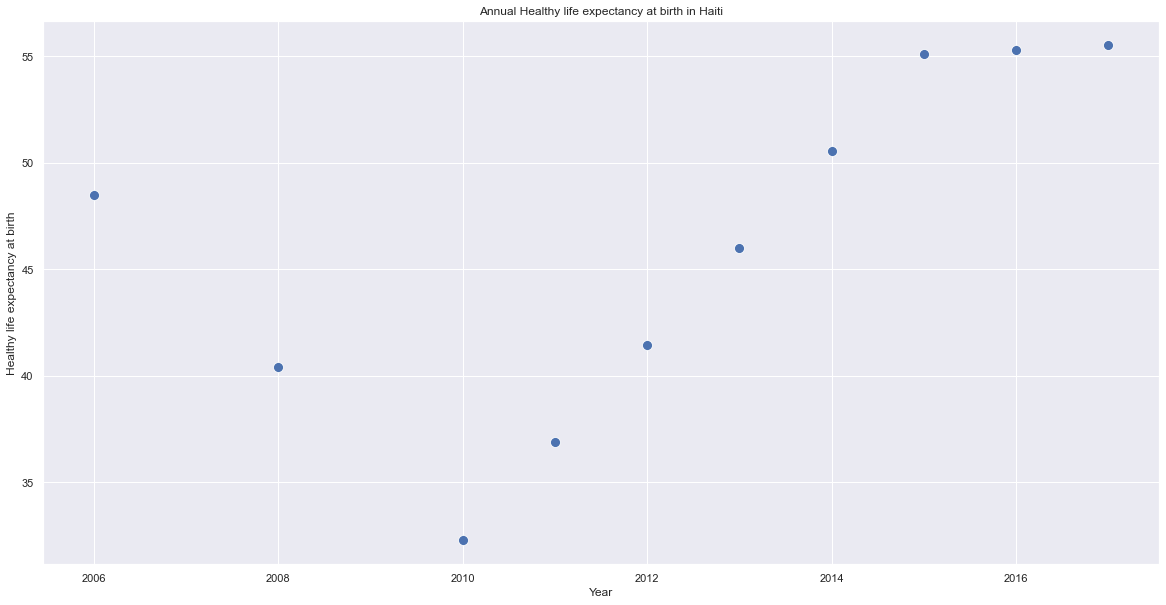

In [42]:
df_over_time_haiti = dataframe_over_time.xs('Haiti', level=1, drop_level=False)

fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(
    ax=ax,
    x='Year',
    y='Healthy life expectancy at birth',
    s=100,
    data=df_over_time_haiti)
plt.title("Annual Healthy life expectancy at birth in Haiti")

####  5.3.2. Social Support &  Healthy life expectancy at birth

Text(0.5, 1.0, 'Correlation: 0.601160')

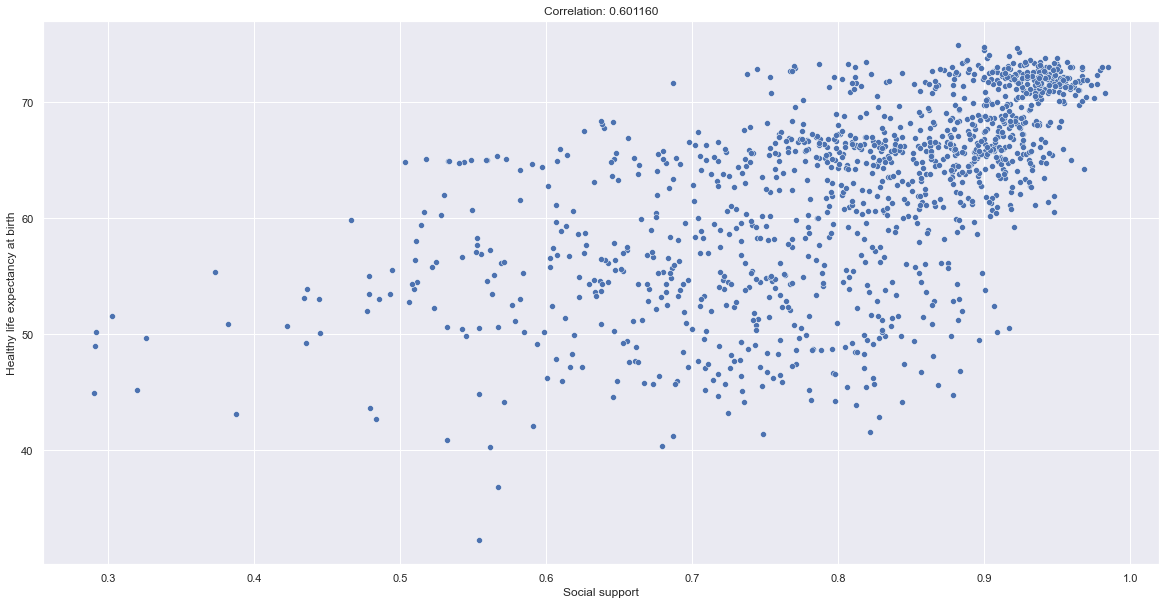

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
plot = sns.scatterplot(
    ax=ax,
    data=dataframe_clean,
    x="Social support",
    y="Healthy life expectancy at birth")
title_string = "Correlation: {:3f}".format(sorted_correlation_list['Healthy life expectancy at birth']['Social support'])
plt.title(title_string)

#### Show values with Social support under 0.35 

In [44]:
df_low_social_support = dataframe_clean[dataframe_clean['Social support'] < 0.35]
df_low_social_support

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16",GDP per capita
227,Burundi,2008,3.563228,6.632450,0.290934,49.020000,0.260069,-0.015204,0.859814,0.439698,0.252771,0.569353,-1.161727,-1.121129,1.542013,0.432757,0.360000,4.289924e+06
228,Burundi,2009,3.791681,6.633399,0.325693,49.660000,0.427356,-0.015334,0.718203,0.640622,0.163643,0.754807,-0.981067,-1.119642,1.496115,0.394578,0.360000,4.299317e+06
274,Central African Republic,2016,2.693061,6.465948,0.290184,44.900002,0.624057,0.053440,0.859073,0.578654,0.494268,0.748755,-1.437883,-1.575128,2.250887,0.835810,0.499000,2.923803e+06
275,Central African Republic,2017,3.475862,6.494117,0.319589,45.200001,0.645252,0.093754,0.889566,0.613865,0.599335,0.650285,-1.523122,-1.538733,2.807074,0.807591,0.499000,3.119728e+06
1510,Togo,2008,2.807855,7.077162,0.291334,50.180000,0.286814,-0.060292,0.931986,0.362498,0.378715,0.170061,-0.578871,-1.062226,1.737782,0.618900,0.437667,1.194433e+07
1511,Togo,2011,2.936221,7.117882,0.302955,51.580002,0.584088,-0.071792,0.832004,0.480281,0.395363,0.512032,-0.533160,-1.063143,1.955605,0.666028,0.437667,1.311844e+07


#### Compare the feature means to the whole data set

### 5.4. Cluster Analysis

In [45]:
from sklearn.cluster import DBSCAN

df_cluster = dataframe_clean.drop(labels='Country name', axis='columns', inplace=False)

clustering = DBSCAN().fit(df_cluster)
np.unique(clustering.labels_)

array([-1], dtype=int64)

#### Needs a principal component analysis

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca.fit(df_cluster)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

principal_component_values = pca.transform(df_cluster)

[1.00000000e+00 6.14543412e-20 1.29573258e-20 9.09314038e-22
 4.76363133e-22 2.97247932e-22 1.66880362e-22 8.77504795e-23]
[1.02489753e+12 2.54071955e+02 1.16664342e+02 3.09056153e+01
 2.23691519e+01 1.76701350e+01 1.32398499e+01 9.60075076e+00]


In [47]:
clustering = DBSCAN().fit(principal_component_values)
np.unique(clustering.labels_)

array([-1], dtype=int64)

#### No further investigation into clustering

In [48]:
"""
dataframe_clean_labels = dataframe_clean
dataframe_clean_labels['label'] = clustering.labels_

sns.pairplot(
    dataframe_clean_labels,
    x_vars=physical_wellbeing_features,
    y_vars=physical_wellbeing_features,
    hue='label')
"""

"\ndataframe_clean_labels = dataframe_clean\ndataframe_clean_labels['label'] = clustering.labels_\n\nsns.pairplot(\n    dataframe_clean_labels,\n    x_vars=physical_wellbeing_features,\n    y_vars=physical_wellbeing_features,\n    hue='label')\n"

#### 5.5.1. Optional Principal Component Analysis

#### 5.5.2. Group by country (Plot with the country as the hue)